In [1]:
%reload_ext autoreload
%autoreload 2

In [2]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 $('div.output_stderr').hide();
 } else {
 $('div.input').show();
 $('div.output_stderr').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action='javascript:code_toggle()'><input STYLE='color: #4286f4' type='submit' value='Click here to toggle on/off the raw code.'></form>''')

In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
from spectral_connectivity import Multitaper
from spectral_connectivity import Connectivity
from spectral_connectivity import multitaper_connectivity

### Test Power Spectrum
#### 200 Hz signal

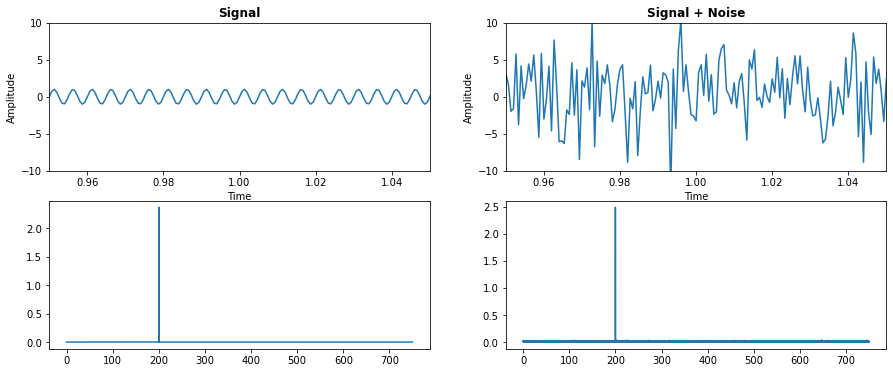

In [5]:
import cupy as cp


frequency_of_interest = 200
sampling_frequency = 1500
time_extent = (0, 50)
n_time_samples = ((time_extent[1] - time_extent[0]) * sampling_frequency) + 1
time = np.linspace(time_extent[0], time_extent[1], num=n_time_samples, endpoint=True)
signal = np.sin(2 * np.pi * time * frequency_of_interest)
noise = np.random.normal(0, 4, len(signal))

plt.figure(figsize=(15, 6))
plt.subplot(2, 2, 1)
plt.plot(time, signal)
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title('Signal', fontweight='bold')
plt.xlim((0.95, 1.05))
plt.ylim((-10, 10))

plt.subplot(2, 2, 2)
plt.plot(time, signal + noise)
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title('Signal + Noise', fontweight='bold')
plt.xlim((0.95, 1.05))
plt.ylim((-10, 10))

plt.subplot(2, 2, 3)
m = Multitaper(signal,
               sampling_frequency=sampling_frequency,
               time_halfbandwidth_product=3,
               start_time=time[0])
c = Connectivity(fourier_coefficients=m.fft(),
                 frequencies=m.frequencies)
plt.plot(c.frequencies, c.power().squeeze());


plt.subplot(2, 2, 4)
m = Multitaper(signal + noise,
               sampling_frequency=sampling_frequency,
               time_halfbandwidth_product=3,
               start_time=time[0])
c = Connectivity(fourier_coefficients=m.fft(),
                 frequencies=m.frequencies)

plt.plot(c.frequencies, c.power().squeeze());

#### 30 Hz signal

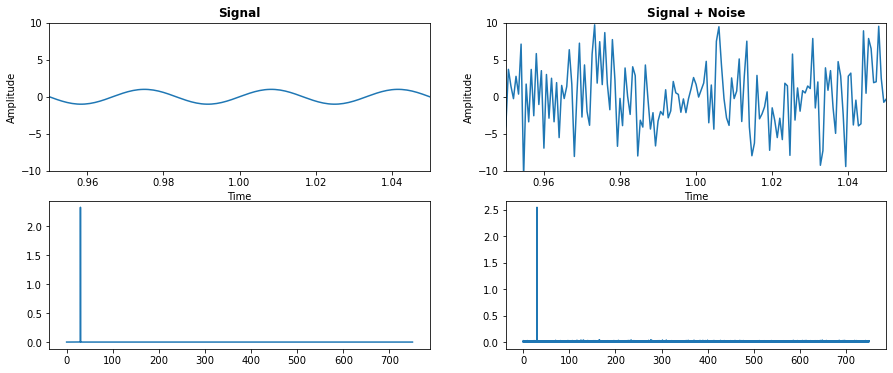

In [6]:
frequency_of_interest = 30
sampling_frequency = 1500
time_extent = (0, 50)
n_time_samples = ((time_extent[1] - time_extent[0]) * sampling_frequency) + 1
time = np.linspace(time_extent[0], time_extent[1], num=n_time_samples, endpoint=True)
signal = np.sin(2 * np.pi * time * frequency_of_interest)
noise = np.random.normal(0, 4, len(signal))

plt.figure(figsize=(15, 6))
plt.subplot(2, 2, 1)
plt.plot(time, signal)
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title('Signal', fontweight='bold')
plt.xlim((0.95, 1.05))
plt.ylim((-10, 10))

plt.subplot(2, 2, 2)
plt.plot(time, signal + noise)
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title('Signal + Noise', fontweight='bold')
plt.xlim((0.95, 1.05))
plt.ylim((-10, 10))

plt.subplot(2, 2, 3)
m = Multitaper(signal,
               sampling_frequency=sampling_frequency,
               time_halfbandwidth_product=3,
               start_time=time[0])
c = Connectivity(fourier_coefficients=m.fft(),
                 frequencies=m.frequencies)
plt.plot(c.frequencies, c.power().squeeze());


plt.subplot(2, 2, 4)
m = Multitaper(signal + noise,
               sampling_frequency=sampling_frequency,
               time_halfbandwidth_product=3,
               start_time=time[0])
c = Connectivity(fourier_coefficients=m.fft(),
                 frequencies=m.frequencies)

plt.plot(c.frequencies, c.power().squeeze());

### Spectrogram

#### No trials, 200 Hz signal with 50 Hz signal starting at 25 seconds

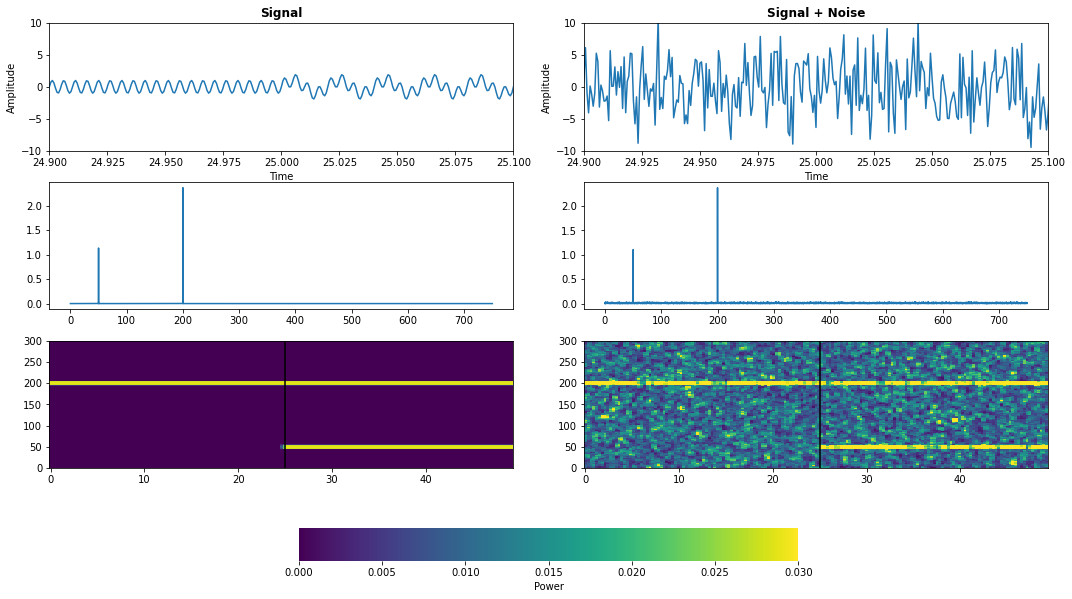

In [7]:
frequency_of_interest = [200, 50]
sampling_frequency = 1500
time_extent = (0, 50)
n_time_samples = ((time_extent[1] - time_extent[0]) * sampling_frequency) + 1
time = np.linspace(time_extent[0], time_extent[1], num=n_time_samples, endpoint=True)
signal = np.sin(2 * np.pi * time[:, np.newaxis] * frequency_of_interest)
signal[:n_time_samples // 2, 1] = 0 
signal = signal.sum(axis=1)
noise = np.random.normal(0, 4, signal.shape)

fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 9))
axes[0, 0].plot(time, signal)
axes[0, 0].set_xlabel('Time')
axes[0, 0].set_ylabel('Amplitude')
axes[0, 0].set_title('Signal', fontweight='bold')
axes[0, 0].set_xlim((24.90, 25.10))
axes[0, 0].set_ylim((-10, 10))

axes[0, 1].plot(time, signal + noise)
axes[0, 1].set_xlabel('Time')
axes[0, 1].set_ylabel('Amplitude')
axes[0, 1].set_title('Signal + Noise', fontweight='bold')
axes[0, 1].set_xlim((24.90, 25.10))
axes[0, 1].set_ylim((-10, 10))

m = Multitaper(signal,
               sampling_frequency=sampling_frequency,
               time_halfbandwidth_product=3,
               start_time=time[0])
c = Connectivity(fourier_coefficients=m.fft(),
                 frequencies=m.frequencies)
axes[1, 0].plot(c.frequencies, c.power().squeeze())

m = Multitaper(signal + noise,
               sampling_frequency=sampling_frequency,
               time_halfbandwidth_product=3,
               start_time=time[0])
c = Connectivity(fourier_coefficients=m.fft(),
                 frequencies=m.frequencies)
axes[1, 1].plot(c.frequencies, c.power().squeeze())


m = Multitaper(signal,
               sampling_frequency=sampling_frequency,
               time_halfbandwidth_product=3,
               time_window_duration=0.600,
               time_window_step=0.300,
               start_time=time[0])
c = Connectivity(fourier_coefficients=m.fft(),
                 frequencies=m.frequencies,
                 time=m.time)
mesh = axes[2, 0].pcolormesh(c.time, c.frequencies, c.power().squeeze().T,
                             vmin=0.0, vmax=0.03, cmap='viridis')
axes[2, 0].set_ylim((0, 300))
axes[2, 0].axvline(time[int(np.fix(n_time_samples / 2))], color='black')

m = Multitaper(signal + noise,
               sampling_frequency=sampling_frequency,
               time_halfbandwidth_product=3,
               time_window_duration=0.600,
               time_window_step=0.300,
               start_time=time[0])
c = Connectivity(fourier_coefficients=m.fft(),
                 frequencies=m.frequencies,
                 time=m.time)
mesh = axes[2, 1].pcolormesh(c.time, c.frequencies, c.power().squeeze().T,
                             vmin=0.0, vmax=0.03, cmap='viridis')
axes[2, 1].set_ylim((0, 300))
axes[2, 1].axvline(time[int(np.fix(n_time_samples / 2))], color='black')

plt.tight_layout()
cb = fig.colorbar(mesh, ax=axes.ravel().tolist(), orientation='horizontal',
                  shrink=.5, aspect=15, pad=0.1, label='Power')
cb.outline.set_linewidth(0)

#### With trial structure (time x trials)

frequency resolution: 33.333333333333336


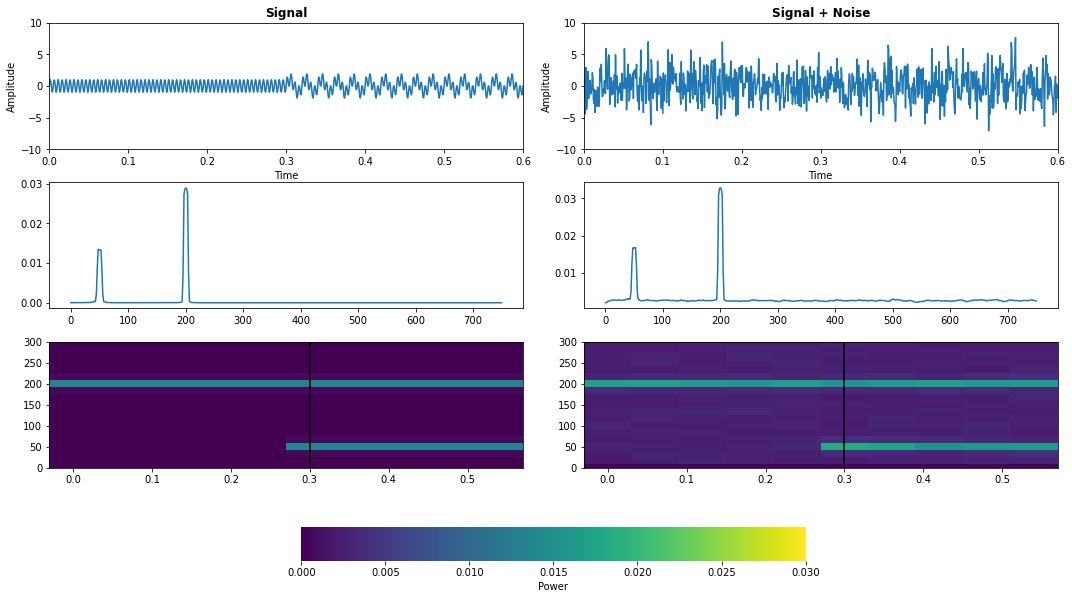

In [8]:
time_halfbandwidth_product = 1

frequency_of_interest = [200, 50]
time_extent = (0, 0.600)
n_trials = 100
sampling_frequency = 1500
n_time_samples = int(((time_extent[1] - time_extent[0]) * sampling_frequency) + 1)
time = np.linspace(time_extent[0], time_extent[1], num=n_time_samples, endpoint=True)
signal = np.sin(2 * np.pi * time[:, np.newaxis] * frequency_of_interest)
signal[:n_time_samples // 2, 1] = 0 
signal = signal.sum(axis=1)[:, np.newaxis, np.newaxis]
noise = np.random.normal(0, 2, size=(n_time_samples, n_trials, 1))

fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 9))
axes[0, 0].plot(time, signal.squeeze())
axes[0, 0].set_xlim(time_extent)
axes[0, 0].set_xlabel('Time')
axes[0, 0].set_ylabel('Amplitude')
axes[0, 0].set_title('Signal', fontweight='bold')
axes[0, 0].set_ylim((-10, 10))

axes[0, 1].plot(time, signal[:, 0, 0] + noise[:, 0, 0])
axes[0, 1].set_xlabel('Time')
axes[0, 1].set_ylabel('Amplitude')
axes[0, 1].set_title('Signal + Noise', fontweight='bold')
axes[0, 1].set_xlim(time_extent)
axes[0, 1].set_ylim((-10, 10))

m = Multitaper(signal,
               sampling_frequency=sampling_frequency,
               time_halfbandwidth_product=3,
               start_time=time[0])
c = Connectivity(fourier_coefficients=m.fft(),
                 frequencies=m.frequencies)
axes[1, 0].plot(c.frequencies, c.power().squeeze())

m = Multitaper(signal + noise,
               sampling_frequency=sampling_frequency,
               time_halfbandwidth_product=3,
               start_time=time[0])
c = Connectivity(fourier_coefficients=m.fft(),
                 frequencies=m.frequencies)
axes[1, 1].plot(c.frequencies, c.power().squeeze())


m = Multitaper(signal,
               sampling_frequency=sampling_frequency,
               time_halfbandwidth_product=time_halfbandwidth_product,
               time_window_duration=0.060,
               time_window_step=0.060,
               start_time=time[0])
c = Connectivity(fourier_coefficients=m.fft(),
                 frequencies=m.frequencies,
                 time=m.time)
mesh = axes[2, 0].pcolormesh(c.time, c.frequencies, c.power().squeeze().T,
                             vmin=0.0, vmax=0.03, cmap='viridis')
axes[2, 0].set_ylim((0, 300))
axes[2, 0].axvline(time[int(np.fix(n_time_samples / 2))], color='black')

m = Multitaper(signal + noise,
               sampling_frequency=sampling_frequency,
               time_halfbandwidth_product=time_halfbandwidth_product,
               time_window_duration=0.060,
               time_window_step=0.060,
               start_time=time[0])
c = Connectivity(fourier_coefficients=m.fft(),
                 frequencies=m.frequencies,
                 time=m.time)
mesh = axes[2, 1].pcolormesh(c.time, c.frequencies, c.power().squeeze().T,
                             vmin=0.0, vmax=0.03, cmap='viridis')
axes[2, 1].set_ylim((0, 300))
axes[2, 1].axvline(time[int(np.fix(n_time_samples / 2))], color='black')

plt.tight_layout()
cb = fig.colorbar(mesh, ax=axes.ravel().tolist(), orientation='horizontal',
                  shrink=.5, aspect=15, pad=0.1, label='Power')
cb.outline.set_linewidth(0)
print('frequency resolution: {}'.format(m.frequency_resolution))

#### Decrease frequency resolution by decreasing time_halfbandwidth

frequency resolution: 100.0


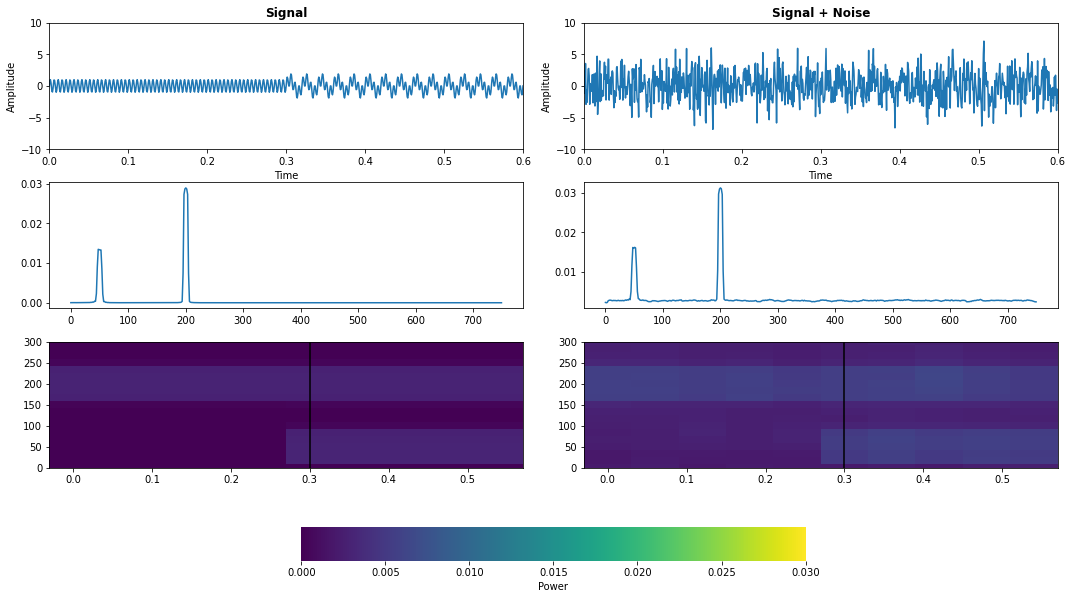

In [9]:
time_halfbandwidth_product = 3

frequency_of_interest = [200, 50]
time_extent = (0, 0.600)
n_trials = 100
sampling_frequency = 1500
n_time_samples = int(((time_extent[1] - time_extent[0]) * sampling_frequency) + 1)
time = np.linspace(time_extent[0], time_extent[1], num=n_time_samples, endpoint=True)
signal = np.sin(2 * np.pi * time[:, np.newaxis] * frequency_of_interest)
signal[:n_time_samples // 2, 1] = 0 
signal = signal.sum(axis=1)[:, np.newaxis, np.newaxis]
noise = np.random.normal(0, 2, size=(n_time_samples, n_trials, 1))

fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 9))
axes[0, 0].plot(time, signal.squeeze())
axes[0, 0].set_xlim(time_extent)
axes[0, 0].set_xlabel('Time')
axes[0, 0].set_ylabel('Amplitude')
axes[0, 0].set_title('Signal', fontweight='bold')
axes[0, 0].set_ylim((-10, 10))

axes[0, 1].plot(time, signal[:, 0, 0] + noise[:, 0, 0])
axes[0, 1].set_xlabel('Time')
axes[0, 1].set_ylabel('Amplitude')
axes[0, 1].set_title('Signal + Noise', fontweight='bold')
axes[0, 1].set_xlim(time_extent)
axes[0, 1].set_ylim((-10, 10))

m = Multitaper(signal,
               sampling_frequency=sampling_frequency,
               time_halfbandwidth_product=time_halfbandwidth_product,
               start_time=time[0])
c = Connectivity(fourier_coefficients=m.fft(),
                 frequencies=m.frequencies)
axes[1, 0].plot(c.frequencies, c.power().squeeze())

m = Multitaper(signal + noise,
               sampling_frequency=sampling_frequency,
               time_halfbandwidth_product=time_halfbandwidth_product,
               start_time=time[0])
c = Connectivity(fourier_coefficients=m.fft(),
                 frequencies=m.frequencies)
axes[1, 1].plot(c.frequencies, c.power().squeeze())


m = Multitaper(signal,
               sampling_frequency=sampling_frequency,
               time_halfbandwidth_product=time_halfbandwidth_product,
               time_window_duration=0.060,
               time_window_step=0.060,
               start_time=time[0])
c = Connectivity(fourier_coefficients=m.fft(),
                 frequencies=m.frequencies,
                 time=m.time)
mesh = axes[2, 0].pcolormesh(c.time, c.frequencies, c.power().squeeze().T,
                             vmin=0.0, vmax=0.03, cmap='viridis')
axes[2, 0].set_ylim((0, 300))
axes[2, 0].axvline(time[int(np.fix(n_time_samples / 2))], color='black')

m = Multitaper(signal + noise,
               sampling_frequency=sampling_frequency,
               time_halfbandwidth_product=time_halfbandwidth_product,
               time_window_duration=0.060,
               time_window_step=0.060,
               start_time=time[0])
c = Connectivity(fourier_coefficients=m.fft(),
                 frequencies=m.frequencies,
                 time=m.time)
mesh = axes[2, 1].pcolormesh(c.time, c.frequencies, c.power().squeeze().T,
                             vmin=0.0, vmax=0.03, cmap='viridis')
axes[2, 1].set_ylim((0, 300))
axes[2, 1].axvline(time[int(np.fix(n_time_samples / 2))], color='black')

plt.tight_layout()
cb = fig.colorbar(mesh, ax=axes.ravel().tolist(), orientation='horizontal',
                  shrink=.5, aspect=15, pad=0.1, label='Power')
cb.outline.set_linewidth(0)
print('frequency resolution: {}'.format(m.frequency_resolution))

### Coherence

#### No trials, 200 Hz, $\pi / 2$ phase offset

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


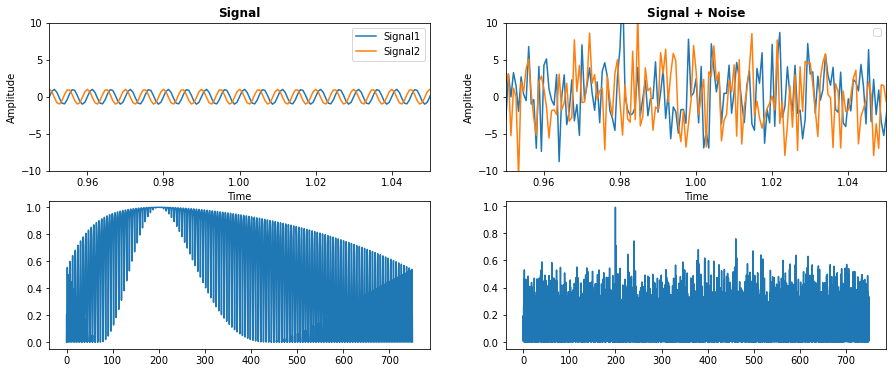

In [10]:
time_halfbandwidth_product = 5
frequency_of_interest = 200
sampling_frequency = 1500
time_extent = (0, 50)
n_signals = 2
n_time_samples = ((time_extent[1] - time_extent[0]) * sampling_frequency) + 1
time = np.linspace(time_extent[0], time_extent[1], num=n_time_samples, endpoint=True)
signal = np.zeros((n_time_samples, n_signals))
signal[:, 0] = np.sin(2 * np.pi * time * frequency_of_interest)
phase_offset = np.pi / 2
signal[:, 1] = np.sin((2 * np.pi * time * frequency_of_interest) + phase_offset)
noise = np.random.normal(0, 4, signal.shape)

plt.figure(figsize=(15, 6))
plt.subplot(2, 2, 1)
plt.title('Signal', fontweight='bold')
plt.plot(time, signal[:, 0], label='Signal1')
plt.plot(time, signal[:, 1], label='Signal2')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.xlim((0.95, 1.05))
plt.ylim((-10, 10))
plt.legend()

plt.subplot(2, 2, 2)
plt.title('Signal + Noise', fontweight='bold')
plt.plot(time, signal + noise)
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.xlim((0.95, 1.05))
plt.ylim((-10, 10))
plt.legend()

m = Multitaper(signal,
               sampling_frequency=sampling_frequency,
               time_halfbandwidth_product=time_halfbandwidth_product,
               start_time=time[0])
c = Connectivity(fourier_coefficients=m.fft(),
                 frequencies=m.frequencies)
plt.subplot(2, 2, 3)
plt.plot(c.frequencies, c.coherence_magnitude()[0, :, 0, 1])


m = Multitaper(signal + noise,
               sampling_frequency=sampling_frequency,
               time_halfbandwidth_product=time_halfbandwidth_product,
               start_time=time[0])
c = Connectivity(fourier_coefficients=m.fft(),
                 frequencies=m.frequencies)
plt.subplot(2, 2, 4)
plt.plot(c.frequencies, c.coherence_magnitude()[0, :, 0, 1]);


#### With trial structure (time x trials), 200 Hz, $\pi / 2$ phase offset

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


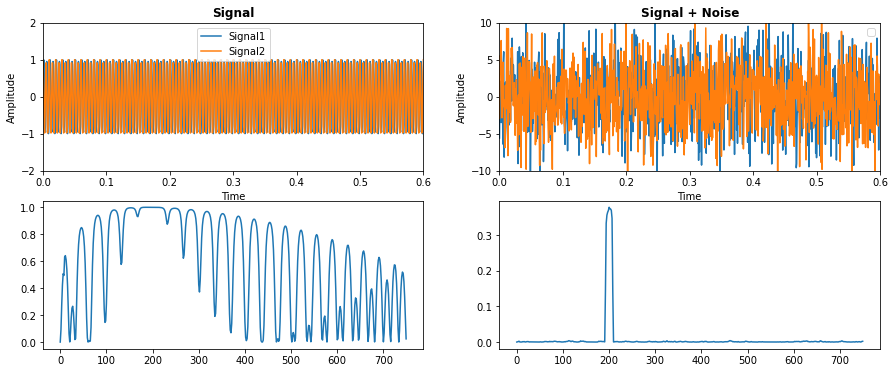

In [11]:
time_halfbandwidth_product = 5
frequency_of_interest = 200
sampling_frequency = 1500
time_extent = (0, 0.600)
n_trials = 100
n_signals = 2
n_time_samples = int(((time_extent[1] - time_extent[0]) * sampling_frequency) + 1)
time = np.linspace(time_extent[0], time_extent[1], num=n_time_samples, endpoint=True)[:, np.newaxis]
signal = np.zeros((n_time_samples, n_trials, n_signals))
signal[:, :, 0] = np.sin(2 * np.pi * time * frequency_of_interest)
phase_offset = np.pi / 2
signal[:, :, 1] = np.sin((2 * np.pi * time * frequency_of_interest) + phase_offset)
noise = np.random.normal(0, 4, signal.shape)

plt.figure(figsize=(15, 6))
plt.subplot(2, 2, 1)
plt.title('Signal', fontweight='bold')
plt.plot(time, signal[:, 0, 0], label='Signal1')
plt.plot(time, signal[:, 0, 1], label='Signal2')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.xlim(time_extent)
plt.ylim((-2, 2))
plt.legend()

plt.subplot(2, 2, 2)
plt.title('Signal + Noise', fontweight='bold')
plt.plot(time, signal[:, 0, :] + noise[:, 0, :])
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.xlim(time_extent)
plt.ylim((-10, 10))
plt.legend()

m = Multitaper(signal,
               sampling_frequency=sampling_frequency,
               time_halfbandwidth_product=time_halfbandwidth_product,
               start_time=time[0])
c = Connectivity(fourier_coefficients=m.fft(),
                 frequencies=m.frequencies)
plt.subplot(2, 2, 3)
plt.plot(c.frequencies, c.coherence_magnitude()[0, :, 0, 1])


m = Multitaper(signal + noise,
               sampling_frequency=sampling_frequency,
               time_halfbandwidth_product=time_halfbandwidth_product,
               start_time=time[0])
c = Connectivity(fourier_coefficients=m.fft(),
                 frequencies=m.frequencies)
plt.subplot(2, 2, 4)
plt.plot(c.frequencies, c.coherence_magnitude()[0, :, 0, 1]);

### Cohereograms

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


frequency resolution: 50.0


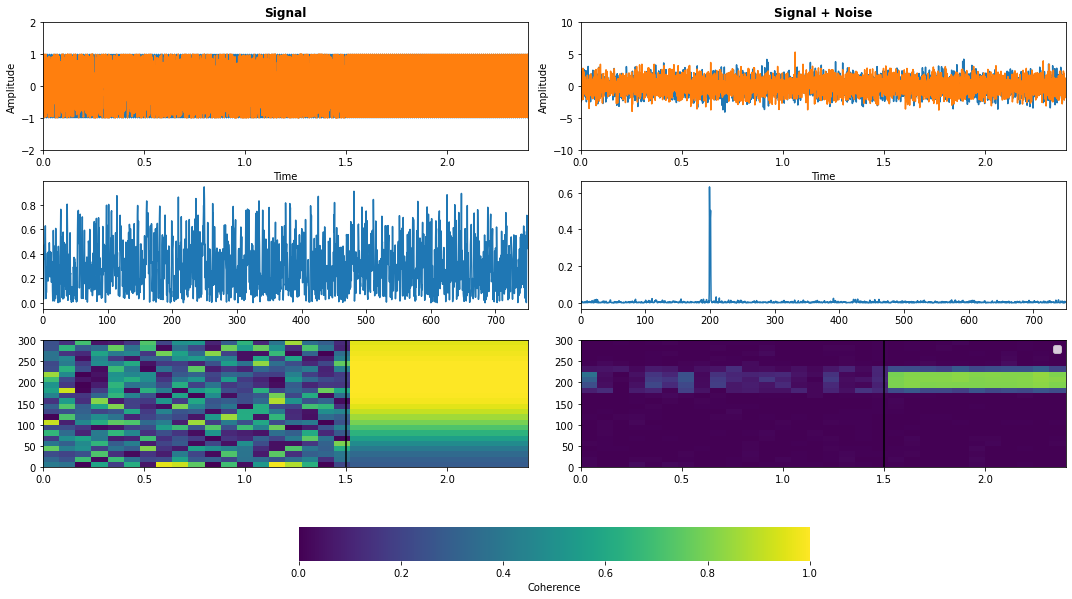

In [12]:
time_halfbandwidth_product = 2
frequency_of_interest = 200
sampling_frequency = 1500
time_extent = (0, 2.400)
n_trials = 100
n_signals = 2
n_time_samples = int(((time_extent[1] - time_extent[0]) * sampling_frequency) + 1)
time = np.linspace(time_extent[0], time_extent[1], num=n_time_samples, endpoint=True)[:, np.newaxis]
signal = np.zeros((n_time_samples, n_trials, n_signals))
signal[:, :, 0] = np.sin(2 * np.pi * time * frequency_of_interest)
phase_offset = np.random.uniform(-np.pi, np.pi, size=(n_time_samples, 1))
phase_offset[np.where(time > 1.5), :] = np.pi / 2
signal[:, :, 1] = np.sin((2 * np.pi * time * frequency_of_interest) + phase_offset)
noise = np.random.normal(0, 1, signal.shape)

fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 9))
axes[0, 0].set_title('Signal', fontweight='bold')
axes[0, 0].plot(time, signal[:, 0, 0], label='Signal1')
axes[0, 0].plot(time, signal[:, 0, 1], label='Signal2')
axes[0, 0].set_xlabel('Time')
axes[0, 0].set_ylabel('Amplitude')
axes[0, 0].set_xlim(time_extent)
axes[0, 0].set_ylim((-2, 2))
plt.legend()

axes[0, 1].set_title('Signal + Noise', fontweight='bold')
axes[0, 1].plot(time, signal[:, 0, :] + noise[:, 0, :])
axes[0, 1].set_xlabel('Time')
axes[0, 1].set_ylabel('Amplitude')
axes[0, 1].set_xlim(time_extent)
axes[0, 1].set_ylim((-10, 10))
plt.legend()

m = Multitaper(signal,
               sampling_frequency=sampling_frequency,
               time_halfbandwidth_product=time_halfbandwidth_product,
               start_time=time[0])
c = Connectivity(fourier_coefficients=m.fft(),
                 frequencies=m.frequencies)
axes[1, 0].plot(c.frequencies, c.coherence_magnitude()[..., 0, 1].squeeze())
axes[1, 0].set_xlim((0, m.nyquist_frequency))

m = Multitaper(signal + noise,
               sampling_frequency=sampling_frequency,
               time_halfbandwidth_product=time_halfbandwidth_product,
               start_time=time[0])
c = Connectivity(fourier_coefficients=m.fft(),
                 frequencies=m.frequencies)
axes[1, 1].plot(c.frequencies,  c.coherence_magnitude()[..., 0, 1].squeeze())
axes[1, 1].set_xlim((0, m.nyquist_frequency))


m = Multitaper(signal,
               sampling_frequency=sampling_frequency,
               time_halfbandwidth_product=time_halfbandwidth_product,
               time_window_duration=0.080,
               time_window_step=0.080,
               start_time=time[0])
c = Connectivity(fourier_coefficients=m.fft(),
                 frequencies=m.frequencies,
                 time=m.time)
time_grid, freq_grid = np.meshgrid(
    np.append(c.time, time_extent[-1]),
    np.append(c.frequencies, m.nyquist_frequency))

mesh = axes[2, 0].pcolormesh(time_grid, freq_grid,  c.coherence_magnitude()[..., 0, 1].squeeze().T,
                             vmin=0.0, vmax=1.0, cmap='viridis')
axes[2, 0].set_ylim((0, 300))
axes[2, 0].set_xlim(time_extent)
axes[2, 0].axvline(1.5, color='black')

m = Multitaper(signal + noise,
               sampling_frequency=sampling_frequency,
               time_halfbandwidth_product=time_halfbandwidth_product,
               time_window_duration=0.080,
               time_window_step=0.080,
               start_time=time[0])
c = Connectivity(fourier_coefficients=m.fft(),
                 frequencies=m.frequencies,
                 time=m.time)

time_grid, freq_grid = np.meshgrid(
    np.append(c.time, time_extent[-1]),
    np.append(c.frequencies, m.nyquist_frequency))

mesh = axes[2, 1].pcolormesh(time_grid, freq_grid,  c.coherence_magnitude()[..., 0, 1].squeeze().T,
                             vmin=0.0, vmax=1.0, cmap='viridis')
axes[2, 1].set_ylim((0, 300))
axes[2, 1].set_xlim(time_extent)
axes[2, 1].axvline(1.5, color='black')

plt.tight_layout()
cb = fig.colorbar(mesh, ax=axes.ravel().tolist(), orientation='horizontal',
                  shrink=.5, aspect=15, pad=0.1, label='Coherence')
cb.outline.set_linewidth(0)
print('frequency resolution: {}'.format(m.frequency_resolution))

### Imaginary Coherence

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


frequency resolution: 50.0


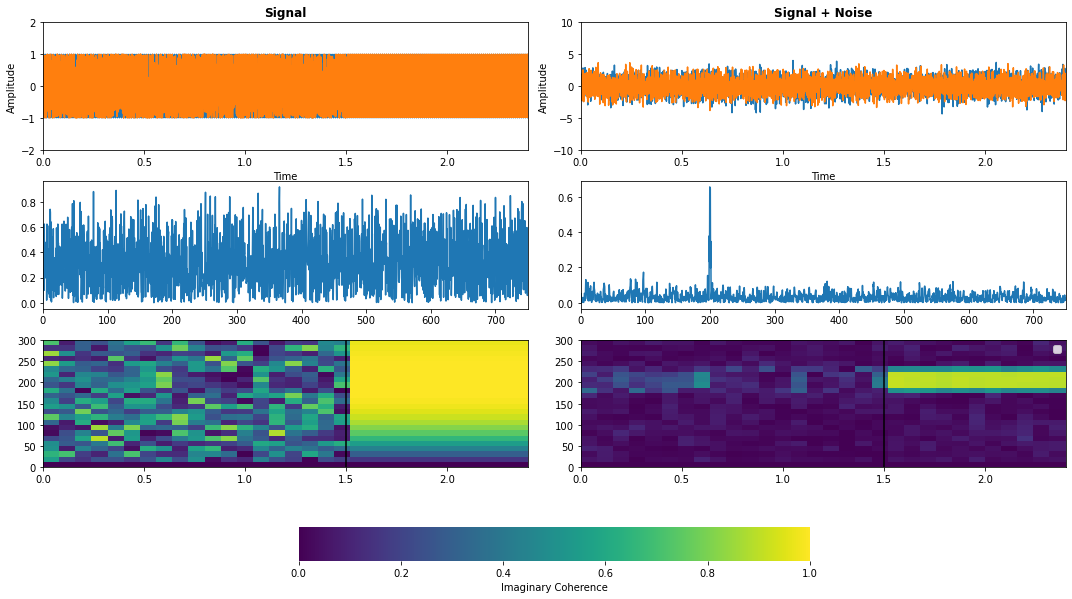

In [13]:
time_halfbandwidth_product = 2
frequency_of_interest = 200
sampling_frequency = 1500
time_extent = (0, 2.400)
n_trials = 100
n_signals = 2
n_time_samples = int(((time_extent[1] - time_extent[0]) * sampling_frequency) + 1)
time = np.linspace(time_extent[0], time_extent[1], num=n_time_samples, endpoint=True)[:, np.newaxis]
signal = np.zeros((n_time_samples, n_trials, n_signals))
signal[:, :, 0] = np.sin(2 * np.pi * time * frequency_of_interest)
phase_offset = np.random.uniform(-np.pi, np.pi, size=(n_time_samples, 1))
phase_offset[np.where(time > 1.5), :] = np.pi / 2
signal[:, :, 1] = np.sin((2 * np.pi * time * frequency_of_interest) + phase_offset)
noise = np.random.normal(0, 1, signal.shape)

fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 9))
axes[0, 0].set_title('Signal', fontweight='bold')
axes[0, 0].plot(time, signal[:, 0, 0], label='Signal1')
axes[0, 0].plot(time, signal[:, 0, 1], label='Signal2')
axes[0, 0].set_xlabel('Time')
axes[0, 0].set_ylabel('Amplitude')
axes[0, 0].set_xlim(time_extent)
axes[0, 0].set_ylim((-2, 2))
plt.legend()

axes[0, 1].set_title('Signal + Noise', fontweight='bold')
axes[0, 1].plot(time, signal[:, 0, :] + noise[:, 0, :])
axes[0, 1].set_xlabel('Time')
axes[0, 1].set_ylabel('Amplitude')
axes[0, 1].set_xlim(time_extent)
axes[0, 1].set_ylim((-10, 10))
plt.legend()

m = Multitaper(signal,
               sampling_frequency=sampling_frequency,
               time_halfbandwidth_product=time_halfbandwidth_product,
               start_time=time[0])
c = Connectivity(fourier_coefficients=m.fft(),
                 frequencies=m.frequencies)
axes[1, 0].plot(c.frequencies, c.imaginary_coherence()[..., 0, 1].squeeze())
axes[1, 0].set_xlim((0, m.nyquist_frequency))

m = Multitaper(signal + noise,
               sampling_frequency=sampling_frequency,
               time_halfbandwidth_product=time_halfbandwidth_product,
               start_time=time[0])
c = Connectivity(fourier_coefficients=m.fft(),
                 frequencies=m.frequencies)
axes[1, 1].plot(c.frequencies,  c.imaginary_coherence()[..., 0, 1].squeeze())
axes[1, 1].set_xlim((0, m.nyquist_frequency))


m = Multitaper(signal,
               sampling_frequency=sampling_frequency,
               time_halfbandwidth_product=time_halfbandwidth_product,
               time_window_duration=0.080,
               time_window_step=0.080,
               start_time=time[0])
c = Connectivity(fourier_coefficients=m.fft(),
                 frequencies=m.frequencies,
                 time=m.time)
time_grid, freq_grid = np.meshgrid(
    np.append(c.time, time_extent[-1]),
    np.append(c.frequencies, m.nyquist_frequency))

mesh = axes[2, 0].pcolormesh(time_grid, freq_grid,  c.imaginary_coherence()[..., 0, 1].squeeze().T,
                             vmin=0.0, vmax=1.0, cmap='viridis')
axes[2, 0].set_ylim((0, 300))
axes[2, 0].set_xlim(time_extent)
axes[2, 0].axvline(1.5, color='black')

m = Multitaper(signal + noise,
               sampling_frequency=sampling_frequency,
               time_halfbandwidth_product=time_halfbandwidth_product,
               time_window_duration=0.080,
               time_window_step=0.080,
               start_time=time[0])
c = Connectivity(fourier_coefficients=m.fft(),
                 frequencies=m.frequencies,
                 time=m.time)

time_grid, freq_grid = np.meshgrid(
    np.append(c.time, time_extent[-1]),
    np.append(c.frequencies, m.nyquist_frequency))

mesh = axes[2, 1].pcolormesh(time_grid, freq_grid,  c.imaginary_coherence()[..., 0, 1].squeeze().T,
                             vmin=0.0, vmax=1.0, cmap='viridis')
axes[2, 1].set_ylim((0, 300))
axes[2, 1].set_xlim(time_extent)
axes[2, 1].axvline(1.5, color='black')

plt.tight_layout()
cb = fig.colorbar(mesh, ax=axes.ravel().tolist(), orientation='horizontal',
                  shrink=.5, aspect=15, pad=0.1, label='Imaginary Coherence')
cb.outline.set_linewidth(0)
print('frequency resolution: {}'.format(m.frequency_resolution))

### Phase Locking Value

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


frequency resolution: 50.0


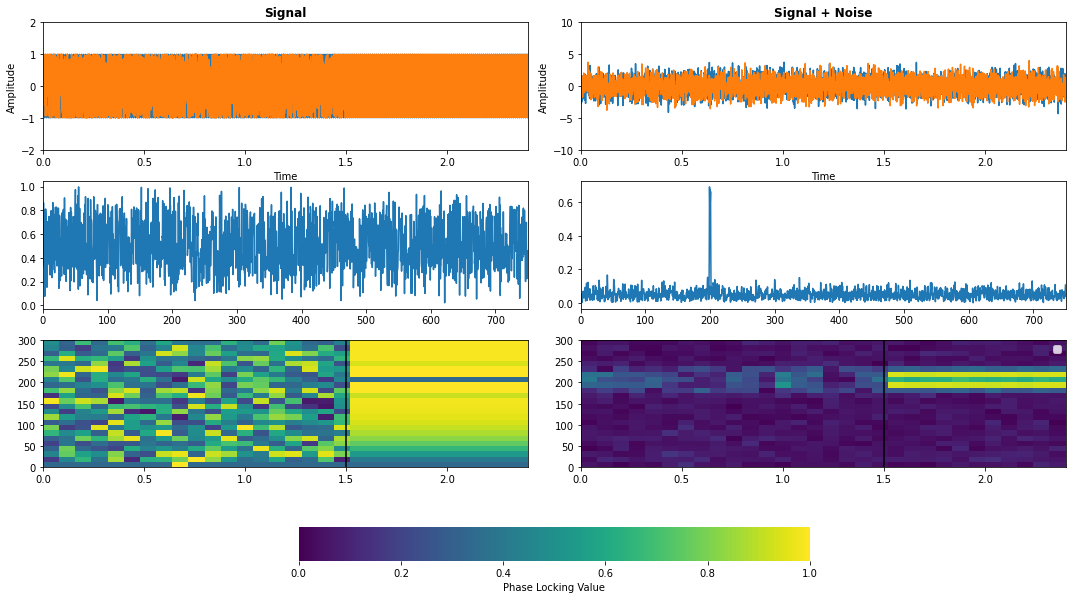

In [14]:
time_halfbandwidth_product = 2
frequency_of_interest = 200
sampling_frequency = 1500
time_extent = (0, 2.400)
n_trials = 100
n_signals = 2
n_time_samples = int(((time_extent[1] - time_extent[0]) * sampling_frequency) + 1)
time = np.linspace(time_extent[0], time_extent[1], num=n_time_samples, endpoint=True)[:, np.newaxis]
signal = np.zeros((n_time_samples, n_trials, n_signals))
signal[:, :, 0] = np.sin(2 * np.pi * time * frequency_of_interest)
phase_offset = np.random.uniform(-np.pi, np.pi, size=(n_time_samples, 1))
phase_offset[np.where(time > 1.5), :] = np.pi / 2
signal[:, :, 1] = np.sin((2 * np.pi * time * frequency_of_interest) + phase_offset)
noise = np.random.normal(0, 1, signal.shape)

fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 9))
axes[0, 0].set_title('Signal', fontweight='bold')
axes[0, 0].plot(time, signal[:, 0, 0], label='Signal1')
axes[0, 0].plot(time, signal[:, 0, 1], label='Signal2')
axes[0, 0].set_xlabel('Time')
axes[0, 0].set_ylabel('Amplitude')
axes[0, 0].set_xlim(time_extent)
axes[0, 0].set_ylim((-2, 2))
plt.legend()

axes[0, 1].set_title('Signal + Noise', fontweight='bold')
axes[0, 1].plot(time, signal[:, 0, :] + noise[:, 0, :])
axes[0, 1].set_xlabel('Time')
axes[0, 1].set_ylabel('Amplitude')
axes[0, 1].set_xlim(time_extent)
axes[0, 1].set_ylim((-10, 10))
plt.legend()

m = Multitaper(signal,
               sampling_frequency=sampling_frequency,
               time_halfbandwidth_product=time_halfbandwidth_product,
               start_time=time[0])
c = Connectivity(fourier_coefficients=m.fft(),
                 frequencies=m.frequencies)
axes[1, 0].plot(c.frequencies, abs(c.phase_locking_value())[..., 0, 1].squeeze())
axes[1, 0].set_xlim((0, m.nyquist_frequency))

m = Multitaper(signal + noise,
               sampling_frequency=sampling_frequency,
               time_halfbandwidth_product=time_halfbandwidth_product,
               start_time=time[0])
c = Connectivity(fourier_coefficients=m.fft(),
                 frequencies=m.frequencies)
axes[1, 1].plot(c.frequencies,  abs(c.phase_locking_value())[..., 0, 1].squeeze())
axes[1, 1].set_xlim((0, m.nyquist_frequency))


m = Multitaper(signal,
               sampling_frequency=sampling_frequency,
               time_halfbandwidth_product=time_halfbandwidth_product,
               time_window_duration=0.080,
               time_window_step=0.080,
               start_time=time[0])
c = Connectivity(fourier_coefficients=m.fft(),
                 frequencies=m.frequencies,
                 time=m.time)
time_grid, freq_grid = np.meshgrid(
    np.append(c.time, time_extent[-1]),
    np.append(c.frequencies, m.nyquist_frequency))

mesh = axes[2, 0].pcolormesh(time_grid, freq_grid,  abs(c.phase_locking_value())[..., 0, 1].squeeze().T,
                             vmin=0.0, vmax=1.0, cmap='viridis')
axes[2, 0].set_ylim((0, 300))
axes[2, 0].set_xlim(time_extent)
axes[2, 0].axvline(1.5, color='black')

m = Multitaper(signal + noise,
               sampling_frequency=sampling_frequency,
               time_halfbandwidth_product=time_halfbandwidth_product,
               time_window_duration=0.080,
               time_window_step=0.080,
               start_time=time[0])
c = Connectivity(fourier_coefficients=m.fft(),
                 frequencies=m.frequencies,
                 time=m.time)

time_grid, freq_grid = np.meshgrid(
    np.append(c.time, time_extent[-1]),
    np.append(c.frequencies, m.nyquist_frequency))

mesh = axes[2, 1].pcolormesh(time_grid, freq_grid, abs(c.phase_locking_value())[..., 0, 1].squeeze().T,
                             vmin=0.0, vmax=1.0, cmap='viridis')
axes[2, 1].set_ylim((0, 300))
axes[2, 1].set_xlim(time_extent)
axes[2, 1].axvline(1.5, color='black')

plt.tight_layout()
cb = fig.colorbar(mesh, ax=axes.ravel().tolist(), orientation='horizontal',
                  shrink=.5, aspect=15, pad=0.1, label='Phase Locking Value')
cb.outline.set_linewidth(0)
print('frequency resolution: {}'.format(m.frequency_resolution))

### Phase Lag Index

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


frequency resolution: 50.0


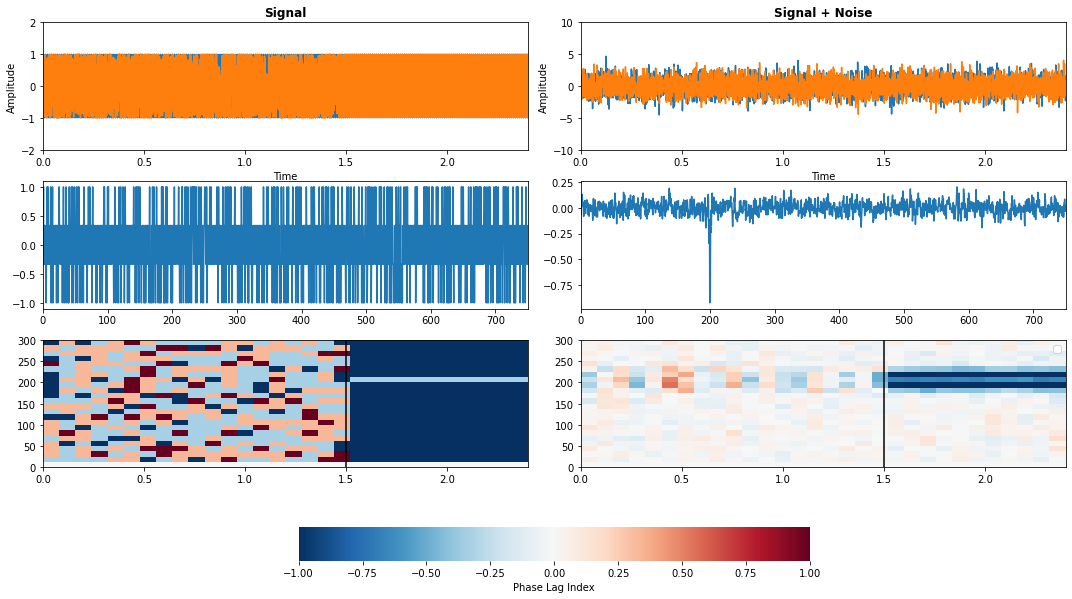

In [15]:
time_halfbandwidth_product = 2
frequency_of_interest = 200
sampling_frequency = 1500
time_extent = (0, 2.400)
n_trials = 100
n_signals = 2
n_time_samples = int(((time_extent[1] - time_extent[0]) * sampling_frequency) + 1)
time = np.linspace(time_extent[0], time_extent[1], num=n_time_samples, endpoint=True)[:, np.newaxis]
signal = np.zeros((n_time_samples, n_trials, n_signals))
signal[:, :, 0] = np.sin(2 * np.pi * time * frequency_of_interest)
phase_offset = np.random.uniform(-np.pi, np.pi, size=(n_time_samples, 1))
phase_offset[np.where(time > 1.5), :] = np.pi / 2
signal[:, :, 1] = np.sin((2 * np.pi * time * frequency_of_interest) + phase_offset)
noise = np.random.normal(0, 1, signal.shape)

fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 9))
axes[0, 0].set_title('Signal', fontweight='bold')
axes[0, 0].plot(time, signal[:, 0, 0], label='Signal1')
axes[0, 0].plot(time, signal[:, 0, 1], label='Signal2')
axes[0, 0].set_xlabel('Time')
axes[0, 0].set_ylabel('Amplitude')
axes[0, 0].set_xlim(time_extent)
axes[0, 0].set_ylim((-2, 2))
plt.legend()

axes[0, 1].set_title('Signal + Noise', fontweight='bold')
axes[0, 1].plot(time, signal[:, 0, :] + noise[:, 0, :])
axes[0, 1].set_xlabel('Time')
axes[0, 1].set_ylabel('Amplitude')
axes[0, 1].set_xlim(time_extent)
axes[0, 1].set_ylim((-10, 10))
plt.legend()

m = Multitaper(signal,
               sampling_frequency=sampling_frequency,
               time_halfbandwidth_product=time_halfbandwidth_product,
               start_time=time[0])
c = Connectivity(fourier_coefficients=m.fft(),
                 frequencies=m.frequencies)
axes[1, 0].plot(c.frequencies, c.phase_lag_index()[..., 0, 1].squeeze())
axes[1, 0].set_xlim((0, m.nyquist_frequency))

m = Multitaper(signal + noise,
               sampling_frequency=sampling_frequency,
               time_halfbandwidth_product=time_halfbandwidth_product,
               start_time=time[0])
c = Connectivity(fourier_coefficients=m.fft(),
                 frequencies=m.frequencies)
axes[1, 1].plot(c.frequencies,  c.phase_lag_index()[..., 0, 1].squeeze())
axes[1, 1].set_xlim((0, m.nyquist_frequency))


m = Multitaper(signal,
               sampling_frequency=sampling_frequency,
               time_halfbandwidth_product=time_halfbandwidth_product,
               time_window_duration=0.080,
               time_window_step=0.080,
               start_time=time[0])
c = Connectivity(fourier_coefficients=m.fft(),
                 frequencies=m.frequencies,
                 time=m.time)
time_grid, freq_grid = np.meshgrid(
    np.append(c.time, time_extent[-1]),
    np.append(c.frequencies, m.nyquist_frequency))

mesh = axes[2, 0].pcolormesh(time_grid, freq_grid,  c.phase_lag_index()[..., 0, 1].squeeze().T,
                             vmin=-1.0, vmax=1.0, cmap='RdBu_r')
axes[2, 0].set_ylim((0, 300))
axes[2, 0].set_xlim(time_extent)
axes[2, 0].axvline(1.5, color='black')

m = Multitaper(signal + noise,
               sampling_frequency=sampling_frequency,
               time_halfbandwidth_product=time_halfbandwidth_product,
               time_window_duration=0.080,
               time_window_step=0.080,
               start_time=time[0])
c = Connectivity(fourier_coefficients=m.fft(),
                 frequencies=m.frequencies,
                 time=m.time)

time_grid, freq_grid = np.meshgrid(
    np.append(c.time, time_extent[-1]),
    np.append(c.frequencies, m.nyquist_frequency))

mesh = axes[2, 1].pcolormesh(time_grid, freq_grid,  c.phase_lag_index()[..., 0, 1].squeeze().T,
                             vmin=-1.0, vmax=1.0, cmap='RdBu_r')
axes[2, 1].set_ylim((0, 300))
axes[2, 1].set_xlim(time_extent)
axes[2, 1].axvline(1.5, color='black')

plt.tight_layout()
cb = fig.colorbar(mesh, ax=axes.ravel().tolist(), orientation='horizontal',
                  shrink=.5, aspect=15, pad=0.1, label='Phase Lag Index')
cb.outline.set_linewidth(0)
print('frequency resolution: {}'.format(m.frequency_resolution))

### Weighted Phase Lag Index

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


frequency resolution: 50.0


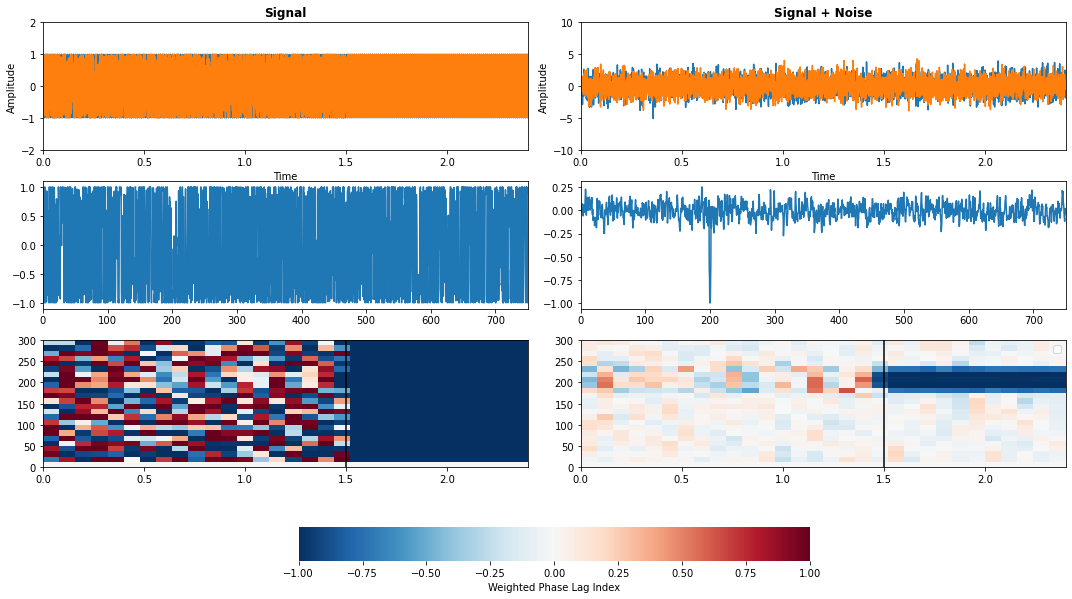

In [16]:
time_halfbandwidth_product = 2
frequency_of_interest = 200
sampling_frequency = 1500
time_extent = (0, 2.400)
n_trials = 100
n_signals = 2
n_time_samples = int(((time_extent[1] - time_extent[0]) * sampling_frequency) + 1)
time = np.linspace(time_extent[0], time_extent[1], num=n_time_samples, endpoint=True)[:, np.newaxis]
signal = np.zeros((n_time_samples, n_trials, n_signals))
signal[:, :, 0] = np.sin(2 * np.pi * time * frequency_of_interest)
phase_offset = np.random.uniform(-np.pi, np.pi, size=(n_time_samples, 1))
phase_offset[np.where(time > 1.5), :] = np.pi / 2
signal[:, :, 1] = np.sin((2 * np.pi * time * frequency_of_interest) + phase_offset)
noise = np.random.normal(0, 1, signal.shape)

fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 9))
axes[0, 0].set_title('Signal', fontweight='bold')
axes[0, 0].plot(time, signal[:, 0, 0], label='Signal1')
axes[0, 0].plot(time, signal[:, 0, 1], label='Signal2')
axes[0, 0].set_xlabel('Time')
axes[0, 0].set_ylabel('Amplitude')
axes[0, 0].set_xlim(time_extent)
axes[0, 0].set_ylim((-2, 2))
plt.legend()

axes[0, 1].set_title('Signal + Noise', fontweight='bold')
axes[0, 1].plot(time, signal[:, 0, :] + noise[:, 0, :])
axes[0, 1].set_xlabel('Time')
axes[0, 1].set_ylabel('Amplitude')
axes[0, 1].set_xlim(time_extent)
axes[0, 1].set_ylim((-10, 10))
plt.legend()

m = Multitaper(signal,
               sampling_frequency=sampling_frequency,
               time_halfbandwidth_product=time_halfbandwidth_product,
               start_time=time[0])
c = Connectivity(fourier_coefficients=m.fft(),
                 frequencies=m.frequencies)
axes[1, 0].plot(c.frequencies, c.weighted_phase_lag_index()[..., 0, 1].squeeze())
axes[1, 0].set_xlim((0, m.nyquist_frequency))

m = Multitaper(signal + noise,
               sampling_frequency=sampling_frequency,
               time_halfbandwidth_product=time_halfbandwidth_product,
               start_time=time[0])
c = Connectivity(fourier_coefficients=m.fft(),
                 frequencies=m.frequencies)
axes[1, 1].plot(c.frequencies,  c.weighted_phase_lag_index()[..., 0, 1].squeeze())
axes[1, 1].set_xlim((0, m.nyquist_frequency))


m = Multitaper(signal,
               sampling_frequency=sampling_frequency,
               time_halfbandwidth_product=time_halfbandwidth_product,
               time_window_duration=0.080,
               time_window_step=0.080,
               start_time=time[0])
c = Connectivity(fourier_coefficients=m.fft(),
                 frequencies=m.frequencies,
                 time=m.time)
time_grid, freq_grid = np.meshgrid(
    np.append(c.time, time_extent[-1]),
    np.append(c.frequencies, m.nyquist_frequency))

mesh = axes[2, 0].pcolormesh(time_grid, freq_grid,  c.weighted_phase_lag_index()[..., 0, 1].squeeze().T,
                             vmin=-1.0, vmax=1.0, cmap='RdBu_r')
axes[2, 0].set_ylim((0, 300))
axes[2, 0].set_xlim(time_extent)
axes[2, 0].axvline(1.5, color='black')

m = Multitaper(signal + noise,
               sampling_frequency=sampling_frequency,
               time_halfbandwidth_product=time_halfbandwidth_product,
               time_window_duration=0.080,
               time_window_step=0.080,
               start_time=time[0])
c = Connectivity(fourier_coefficients=m.fft(),
                 frequencies=m.frequencies,
                 time=m.time)

time_grid, freq_grid = np.meshgrid(
    np.append(c.time, time_extent[-1]),
    np.append(c.frequencies, m.nyquist_frequency))

mesh = axes[2, 1].pcolormesh(time_grid, freq_grid,  c.weighted_phase_lag_index()[..., 0, 1].squeeze().T,
                             vmin=-1.0, vmax=1.0, cmap='RdBu_r')
axes[2, 1].set_ylim((0, 300))
axes[2, 1].set_xlim(time_extent)
axes[2, 1].axvline(1.5, color='black')

plt.tight_layout()
cb = fig.colorbar(mesh, ax=axes.ravel().tolist(), orientation='horizontal',
                  shrink=.5, aspect=15, pad=0.1, label='Weighted Phase Lag Index')
cb.outline.set_linewidth(0)
print('frequency resolution: {}'.format(m.frequency_resolution))

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


frequency resolution: 50.0


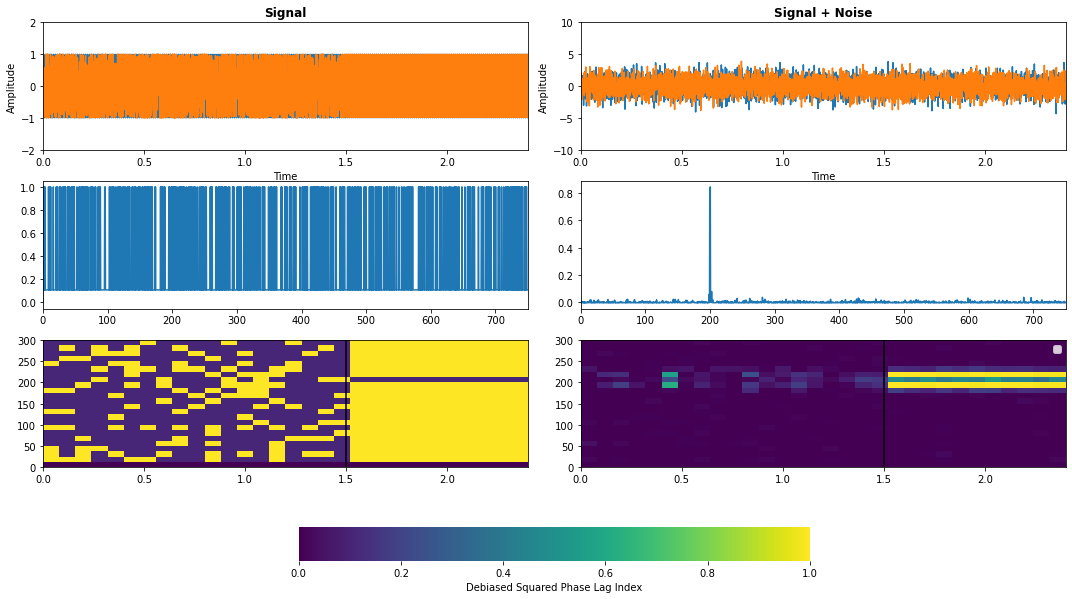

In [17]:
time_halfbandwidth_product = 2
frequency_of_interest = 200
sampling_frequency = 1500
time_extent = (0, 2.400)
n_trials = 100
n_signals = 2
n_time_samples = int(((time_extent[1] - time_extent[0]) * sampling_frequency) + 1)
time = np.linspace(time_extent[0], time_extent[1], num=n_time_samples, endpoint=True)[:, np.newaxis]
signal = np.zeros((n_time_samples, n_trials, n_signals))
signal[:, :, 0] = np.sin(2 * np.pi * time * frequency_of_interest)
phase_offset = np.random.uniform(-np.pi, np.pi, size=(n_time_samples, 1))
phase_offset[np.where(time > 1.5), :] = np.pi / 2
signal[:, :, 1] = np.sin((2 * np.pi * time * frequency_of_interest) + phase_offset)
noise = np.random.normal(0, 1, signal.shape)

fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 9))
axes[0, 0].set_title('Signal', fontweight='bold')
axes[0, 0].plot(time, signal[:, 0, 0], label='Signal1')
axes[0, 0].plot(time, signal[:, 0, 1], label='Signal2')
axes[0, 0].set_xlabel('Time')
axes[0, 0].set_ylabel('Amplitude')
axes[0, 0].set_xlim(time_extent)
axes[0, 0].set_ylim((-2, 2))
plt.legend()

axes[0, 1].set_title('Signal + Noise', fontweight='bold')
axes[0, 1].plot(time, signal[:, 0, :] + noise[:, 0, :])
axes[0, 1].set_xlabel('Time')
axes[0, 1].set_ylabel('Amplitude')
axes[0, 1].set_xlim(time_extent)
axes[0, 1].set_ylim((-10, 10))
plt.legend()

m = Multitaper(signal,
               sampling_frequency=sampling_frequency,
               time_halfbandwidth_product=time_halfbandwidth_product,
               start_time=time[0])
c = Connectivity(fourier_coefficients=m.fft(),
                 frequencies=m.frequencies)
axes[1, 0].plot(c.frequencies, c.debiased_squared_phase_lag_index()[..., 0, 1].squeeze())
axes[1, 0].set_xlim((0, m.nyquist_frequency))

m = Multitaper(signal + noise,
               sampling_frequency=sampling_frequency,
               time_halfbandwidth_product=time_halfbandwidth_product,
               start_time=time[0])
c = Connectivity(fourier_coefficients=m.fft(),
                 frequencies=m.frequencies)
axes[1, 1].plot(c.frequencies,  c.debiased_squared_phase_lag_index()[..., 0, 1].squeeze())
axes[1, 1].set_xlim((0, m.nyquist_frequency))


m = Multitaper(signal,
               sampling_frequency=sampling_frequency,
               time_halfbandwidth_product=time_halfbandwidth_product,
               time_window_duration=0.080,
               time_window_step=0.080,
               start_time=time[0])
c = Connectivity(fourier_coefficients=m.fft(),
                 frequencies=m.frequencies,
                 time=m.time)
time_grid, freq_grid = np.meshgrid(
    np.append(c.time, time_extent[-1]),
    np.append(c.frequencies, m.nyquist_frequency))

mesh = axes[2, 0].pcolormesh(time_grid, freq_grid,  c.debiased_squared_phase_lag_index()[..., 0, 1].squeeze().T,
                             vmin=0.0, vmax=1.0, cmap='viridis')
axes[2, 0].set_ylim((0, 300))
axes[2, 0].set_xlim(time_extent)
axes[2, 0].axvline(1.5, color='black')

m = Multitaper(signal + noise,
               sampling_frequency=sampling_frequency,
               time_halfbandwidth_product=time_halfbandwidth_product,
               time_window_duration=0.080,
               time_window_step=0.080,
               start_time=time[0])
c = Connectivity(fourier_coefficients=m.fft(),
                 frequencies=m.frequencies,
                 time=m.time)

time_grid, freq_grid = np.meshgrid(
    np.append(c.time, time_extent[-1]),
    np.append(c.frequencies, m.nyquist_frequency))

mesh = axes[2, 1].pcolormesh(time_grid, freq_grid,  c.debiased_squared_phase_lag_index()[..., 0, 1].squeeze().T,
                             vmin=0.0, vmax=1.0, cmap='viridis')
axes[2, 1].set_ylim((0, 300))
axes[2, 1].set_xlim(time_extent)
axes[2, 1].axvline(1.5, color='black')

plt.tight_layout()
cb = fig.colorbar(mesh, ax=axes.ravel().tolist(), orientation='horizontal',
                  shrink=.5, aspect=15, pad=0.1, label='Debiased Squared Phase Lag Index')
cb.outline.set_linewidth(0)
print('frequency resolution: {}'.format(m.frequency_resolution))

### Debiased Squared Weighted Phase Lag Index

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


frequency resolution: 50.0


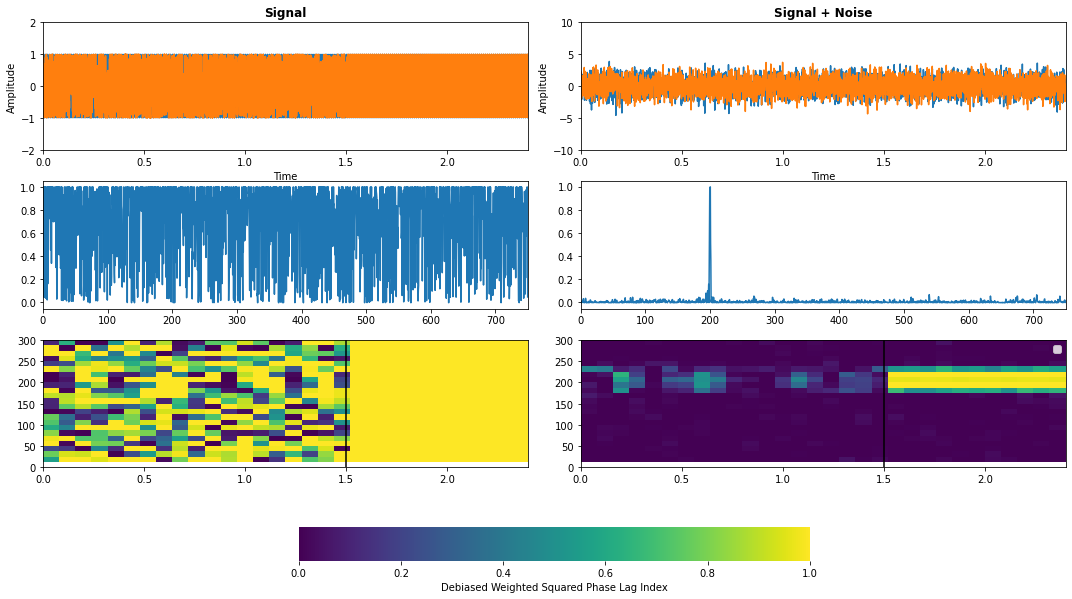

In [18]:
time_halfbandwidth_product = 2
frequency_of_interest = 200
sampling_frequency = 1500
time_extent = (0, 2.400)
n_trials = 100
n_signals = 2
n_time_samples = int(((time_extent[1] - time_extent[0]) * sampling_frequency) + 1)
time = np.linspace(time_extent[0], time_extent[1], num=n_time_samples, endpoint=True)[:, np.newaxis]
signal = np.zeros((n_time_samples, n_trials, n_signals))
signal[:, :, 0] = np.sin(2 * np.pi * time * frequency_of_interest)
phase_offset = np.random.uniform(-np.pi, np.pi, size=(n_time_samples, 1))
phase_offset[np.where(time > 1.5), :] = np.pi / 2
signal[:, :, 1] = np.sin((2 * np.pi * time * frequency_of_interest) + phase_offset)
noise = np.random.normal(0, 1, signal.shape)

fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 9))
axes[0, 0].set_title('Signal', fontweight='bold')
axes[0, 0].plot(time, signal[:, 0, 0], label='Signal1')
axes[0, 0].plot(time, signal[:, 0, 1], label='Signal2')
axes[0, 0].set_xlabel('Time')
axes[0, 0].set_ylabel('Amplitude')
axes[0, 0].set_xlim(time_extent)
axes[0, 0].set_ylim((-2, 2))
plt.legend()

axes[0, 1].set_title('Signal + Noise', fontweight='bold')
axes[0, 1].plot(time, signal[:, 0, :] + noise[:, 0, :])
axes[0, 1].set_xlabel('Time')
axes[0, 1].set_ylabel('Amplitude')
axes[0, 1].set_xlim(time_extent)
axes[0, 1].set_ylim((-10, 10))
plt.legend()

m = Multitaper(signal,
               sampling_frequency=sampling_frequency,
               time_halfbandwidth_product=time_halfbandwidth_product,
               start_time=time[0])
c = Connectivity(fourier_coefficients=m.fft(),
                 frequencies=m.frequencies)
axes[1, 0].plot(c.frequencies, c.debiased_squared_weighted_phase_lag_index()[..., 0, 1].squeeze())
axes[1, 0].set_xlim((0, m.nyquist_frequency))

m = Multitaper(signal + noise,
               sampling_frequency=sampling_frequency,
               time_halfbandwidth_product=time_halfbandwidth_product,
               start_time=time[0])
c = Connectivity(fourier_coefficients=m.fft(),
                 frequencies=m.frequencies)
axes[1, 1].plot(c.frequencies,  c.debiased_squared_weighted_phase_lag_index()[..., 0, 1].squeeze())
axes[1, 1].set_xlim((0, m.nyquist_frequency))


m = Multitaper(signal,
               sampling_frequency=sampling_frequency,
               time_halfbandwidth_product=time_halfbandwidth_product,
               time_window_duration=0.080,
               time_window_step=0.080,
               start_time=time[0])
c = Connectivity(fourier_coefficients=m.fft(),
                 frequencies=m.frequencies,
                 time=m.time)
time_grid, freq_grid = np.meshgrid(
    np.append(c.time, time_extent[-1]),
    np.append(c.frequencies, m.nyquist_frequency))

mesh = axes[2, 0].pcolormesh(time_grid, freq_grid,  c.debiased_squared_weighted_phase_lag_index()[..., 0, 1].squeeze().T,
                             vmin=0.0, vmax=1.0, cmap='viridis')
axes[2, 0].set_ylim((0, 300))
axes[2, 0].set_xlim(time_extent)
axes[2, 0].axvline(1.5, color='black')

m = Multitaper(signal + noise,
               sampling_frequency=sampling_frequency,
               time_halfbandwidth_product=time_halfbandwidth_product,
               time_window_duration=0.080,
               time_window_step=0.080,
               start_time=time[0])
c = Connectivity(fourier_coefficients=m.fft(),
                 frequencies=m.frequencies,
                 time=m.time)

time_grid, freq_grid = np.meshgrid(
    np.append(c.time, time_extent[-1]),
    np.append(c.frequencies, m.nyquist_frequency))

mesh = axes[2, 1].pcolormesh(time_grid, freq_grid,  c.debiased_squared_weighted_phase_lag_index()[..., 0, 1].squeeze().T,
                             vmin=0.0, vmax=1.0, cmap='viridis')
axes[2, 1].set_ylim((0, 300))
axes[2, 1].set_xlim(time_extent)
axes[2, 1].axvline(1.5, color='black')

plt.tight_layout()
cb = fig.colorbar(mesh, ax=axes.ravel().tolist(), orientation='horizontal',
                  shrink=.5, aspect=15, pad=0.1, label='Debiased Weighted Squared Phase Lag Index')
cb.outline.set_linewidth(0)
print('frequency resolution: {}'.format(m.frequency_resolution))

### Pairwise Phase Consistency

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


frequency resolution: 50.0


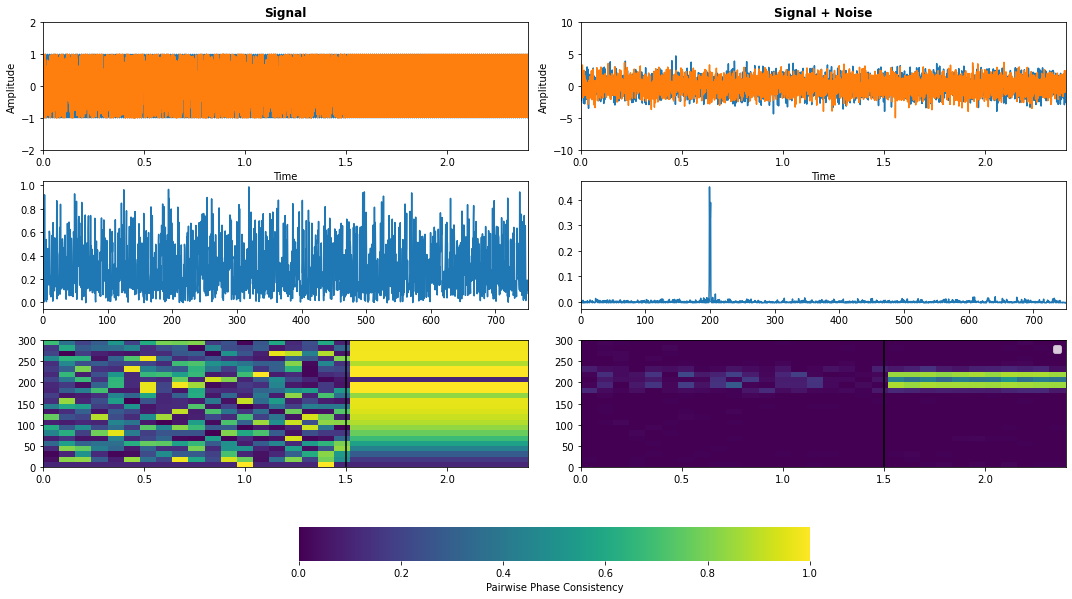

In [19]:
time_halfbandwidth_product = 2
frequency_of_interest = 200
sampling_frequency = 1500
time_extent = (0, 2.400)
n_trials = 100
n_signals = 2
n_time_samples = int(((time_extent[1] - time_extent[0]) * sampling_frequency) + 1)
time = np.linspace(time_extent[0], time_extent[1], num=n_time_samples, endpoint=True)[:, np.newaxis]
signal = np.zeros((n_time_samples, n_trials, n_signals))
signal[:, :, 0] = np.sin(2 * np.pi * time * frequency_of_interest)
phase_offset = np.random.uniform(-np.pi, np.pi, size=(n_time_samples, 1))
phase_offset[np.where(time > 1.5), :] = np.pi / 2
signal[:, :, 1] = np.sin((2 * np.pi * time * frequency_of_interest) + phase_offset)
noise = np.random.normal(0, 1, signal.shape)

fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 9))
axes[0, 0].set_title('Signal', fontweight='bold')
axes[0, 0].plot(time, signal[:, 0, 0], label='Signal1')
axes[0, 0].plot(time, signal[:, 0, 1], label='Signal2')
axes[0, 0].set_xlabel('Time')
axes[0, 0].set_ylabel('Amplitude')
axes[0, 0].set_xlim(time_extent)
axes[0, 0].set_ylim((-2, 2))
plt.legend()

axes[0, 1].set_title('Signal + Noise', fontweight='bold')
axes[0, 1].plot(time, signal[:, 0, :] + noise[:, 0, :])
axes[0, 1].set_xlabel('Time')
axes[0, 1].set_ylabel('Amplitude')
axes[0, 1].set_xlim(time_extent)
axes[0, 1].set_ylim((-10, 10))
plt.legend()

m = Multitaper(signal,
               sampling_frequency=sampling_frequency,
               time_halfbandwidth_product=time_halfbandwidth_product,
               start_time=time[0])
c = Connectivity(fourier_coefficients=m.fft(),
                 frequencies=m.frequencies)
axes[1, 0].plot(c.frequencies, c.pairwise_phase_consistency()[..., 0, 1].squeeze())
axes[1, 0].set_xlim((0, m.nyquist_frequency))

m = Multitaper(signal + noise,
               sampling_frequency=sampling_frequency,
               time_halfbandwidth_product=time_halfbandwidth_product,
               start_time=time[0])
c = Connectivity(fourier_coefficients=m.fft(),
                 frequencies=m.frequencies)
axes[1, 1].plot(c.frequencies,  c.pairwise_phase_consistency()[..., 0, 1].squeeze())
axes[1, 1].set_xlim((0, m.nyquist_frequency))


m = Multitaper(signal,
               sampling_frequency=sampling_frequency,
               time_halfbandwidth_product=time_halfbandwidth_product,
               time_window_duration=0.080,
               time_window_step=0.080,
               start_time=time[0])
c = Connectivity(fourier_coefficients=m.fft(),
                 frequencies=m.frequencies,
                 time=m.time)
time_grid, freq_grid = np.meshgrid(
    np.append(c.time, time_extent[-1]),
    np.append(c.frequencies, m.nyquist_frequency))

mesh = axes[2, 0].pcolormesh(time_grid, freq_grid,  c.pairwise_phase_consistency()[..., 0, 1].squeeze().T,
                             vmin=0.0, vmax=1.0, cmap='viridis')
axes[2, 0].set_ylim((0, 300))
axes[2, 0].set_xlim(time_extent)
axes[2, 0].axvline(1.5, color='black')

m = Multitaper(signal + noise,
               sampling_frequency=sampling_frequency,
               time_halfbandwidth_product=time_halfbandwidth_product,
               time_window_duration=0.080,
               time_window_step=0.080,
               start_time=time[0])
c = Connectivity(fourier_coefficients=m.fft(),
                 frequencies=m.frequencies,
                 time=m.time)

time_grid, freq_grid = np.meshgrid(
    np.append(c.time, time_extent[-1]),
    np.append(c.frequencies, m.nyquist_frequency))

mesh = axes[2, 1].pcolormesh(time_grid, freq_grid,  c.pairwise_phase_consistency()[..., 0, 1].squeeze().T,
                             vmin=0.0, vmax=1.0, cmap='viridis')
axes[2, 1].set_ylim((0, 300))
axes[2, 1].set_xlim(time_extent)
axes[2, 1].axvline(1.5, color='black')

plt.tight_layout()
cb = fig.colorbar(mesh, ax=axes.ravel().tolist(), orientation='horizontal',
                  shrink=.5, aspect=15, pad=0.1, label='Pairwise Phase Consistency')
cb.outline.set_linewidth(0)
print('frequency resolution: {}'.format(m.frequency_resolution))

### Group Delay


#### Signal \#1 leads Signal \#2

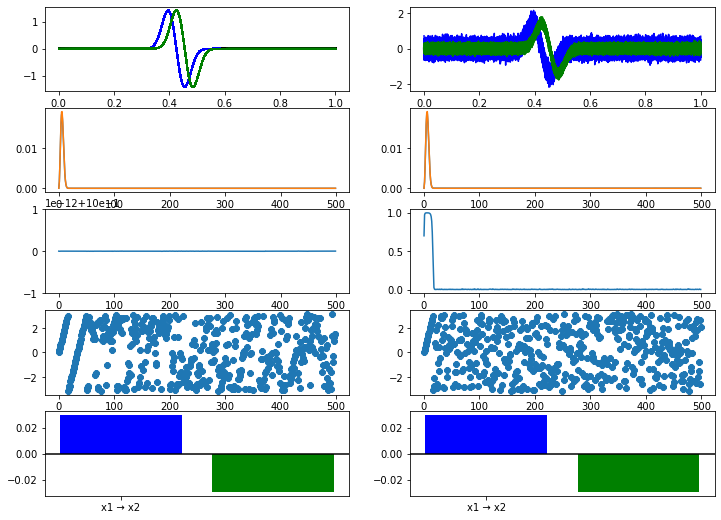

In [20]:
import scipy

sampling_frequency = 1000
time_extent = (0, 1)
n_trials = 500
time_halfbandwidth_product = 1

n_time_samples = ((time_extent[1] - time_extent[0]) * sampling_frequency) + 1
time = np.linspace(time_extent[0], time_extent[1], num=n_time_samples)

signal1 = (scipy.stats.norm.pdf(time, .40, .025) - scipy.stats.norm.pdf(time, .45, .025)) / 10
signal1 = signal1[:, np.newaxis] * np.ones((len(time), n_trials))
signal2 = (scipy.stats.norm.pdf(time, .43, .025) - scipy.stats.norm.pdf(time, .48, .025)) / 10
signal2 = signal2[:, np.newaxis] * np.ones((len(time), n_trials))

noise1 = np.random.normal(0, .2, size=(len(time), n_trials))
noise2 = np.random.normal(0, .1, size=(len(time), n_trials))
data1 = signal1 + noise1
data2 = signal2 + noise2

signals = np.stack((signal1, signal2), axis=-1)
data = np.stack((data1, data2), axis=-1)

fig, axis_handles = plt.subplots(5, 2, figsize=(12, 9))
axis_handles[0, 0].plot(time, signal1, color='blue');
axis_handles[0, 0].plot(time, signal2, color='green');
axis_handles[0, 0].set_xlabel('Time')

axis_handles[0, 1].plot(time, data1, color='blue');
axis_handles[0, 1].plot(time, data2, color='green');
axis_handles[0, 1].set_xlabel('Time')

m = Multitaper(signals,
               sampling_frequency=sampling_frequency,
               time_halfbandwidth_product=time_halfbandwidth_product,
               start_time=time[0])
c = Connectivity(fourier_coefficients=m.fft(),
                 frequencies=m.frequencies,
                 time=m.time)

axis_handles[1, 0].plot(c.frequencies, c.power()[..., 0].squeeze())
axis_handles[1, 0].plot(c.frequencies, c.power()[..., 1].squeeze())
axis_handles[2, 0].plot(c.frequencies, c.coherence_magnitude()[..., 0, 1].squeeze())
axis_handles[3, 0].plot(c.frequencies, c.coherence_phase()[..., 0, 1].squeeze(), linestyle='None', marker='8')

delay, slope, r_value = c.group_delay(frequencies_of_interest=[2, 10], frequency_resolution=m.frequency_resolution)
axis_handles[4, 0].bar([1, 2], [delay[..., 0, 1].squeeze(), delay[..., 1, 0].squeeze()], color=['b', 'g']);
axis_handles[4, 0].set_xlim((0.5, 2.5))
axis_handles[4, 0].axhline(0, color='black');
axis_handles[4, 0].set_xticks([1])
axis_handles[4, 0].set_xticklabels(['x1 → x2'])


m = Multitaper(data,
               sampling_frequency=sampling_frequency,
               time_halfbandwidth_product=time_halfbandwidth_product,
               start_time=time[0])
c = Connectivity(fourier_coefficients=m.fft(),
                 frequencies=m.frequencies,
                 time=m.time)

axis_handles[1, 1].plot(c.frequencies, c.power()[..., 0].squeeze())
axis_handles[1, 1].plot(c.frequencies, c.power()[..., 1].squeeze())
axis_handles[2, 1].plot(c.frequencies, c.coherence_magnitude()[..., 0, 1].squeeze())
axis_handles[3, 1].plot(c.frequencies, c.coherence_phase()[..., 0, 1].squeeze(), linestyle='None', marker='8')

delay, slope, r_value = c.group_delay(frequencies_of_interest=[2, 10], frequency_resolution=m.frequency_resolution)
axis_handles[4, 1].bar([1, 2], [delay[..., 0, 1].squeeze(), delay[..., 1, 0].squeeze()], color=['b', 'g']);
axis_handles[4, 1].set_xlim((0.5, 2.5))
axis_handles[4, 1].axhline(0, color='black');
axis_handles[4, 1].set_xticks([1])
axis_handles[4, 1].set_xticklabels(['x1 → x2']);

#### Signal \#2 leads Signal \#1

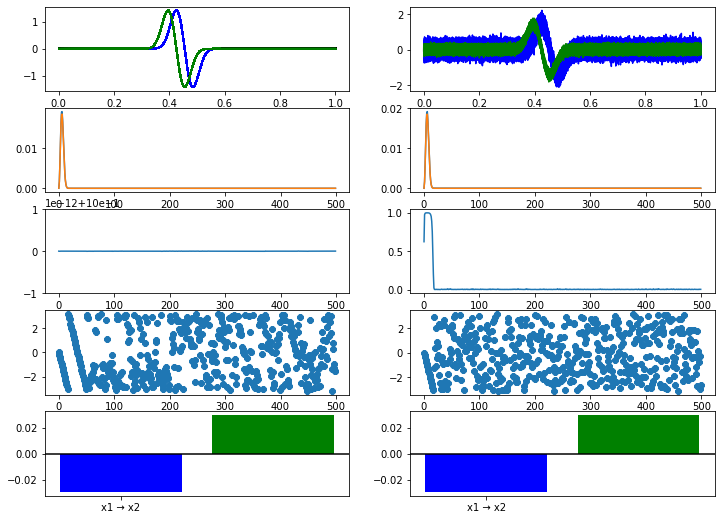

In [21]:
sampling_frequency = 1000
time_extent = (0, 1)
n_trials = 500
time_halfbandwidth_product = 1

n_time_samples = ((time_extent[1] - time_extent[0]) * sampling_frequency) + 1
time = np.linspace(time_extent[0], time_extent[1], num=n_time_samples)

signal1 = (scipy.stats.norm.pdf(time, .43, .025) - scipy.stats.norm.pdf(time, .48, .025)) / 10
signal1 = signal1[:, np.newaxis] * np.ones((len(time), n_trials))
signal2 = (scipy.stats.norm.pdf(time, .40, .025) - scipy.stats.norm.pdf(time, .45, .025)) / 10
signal2 = signal2[:, np.newaxis] * np.ones((len(time), n_trials))

noise1 = np.random.normal(0, .2, size=(len(time), n_trials))
noise2 = np.random.normal(0, .1, size=(len(time), n_trials))
data1 = signal1 + noise1
data2 = signal2 + noise2

signals = np.stack((signal1, signal2), axis=-1)
data = np.stack((data1, data2), axis=-1)

fig, axis_handles = plt.subplots(5, 2, figsize=(12, 9))
axis_handles[0, 0].plot(time, signal1, color='blue');
axis_handles[0, 0].plot(time, signal2, color='green');
axis_handles[0, 0].set_xlabel('Time')

axis_handles[0, 1].plot(time, data1, color='blue');
axis_handles[0, 1].plot(time, data2, color='green');
axis_handles[0, 1].set_xlabel('Time')

m = Multitaper(signals,
               sampling_frequency=sampling_frequency,
               time_halfbandwidth_product=time_halfbandwidth_product,
               start_time=time[0])
c = Connectivity(fourier_coefficients=m.fft(),
                 frequencies=m.frequencies,
                 time=m.time)

axis_handles[1, 0].plot(c.frequencies, c.power()[..., 0].squeeze())
axis_handles[1, 0].plot(c.frequencies, c.power()[..., 1].squeeze())
axis_handles[2, 0].plot(c.frequencies, c.coherence_magnitude()[..., 0, 1].squeeze())
axis_handles[3, 0].plot(c.frequencies, c.coherence_phase()[..., 0, 1].squeeze(), linestyle='None', marker='8')

delay, slope, r_value = c.group_delay(frequencies_of_interest=[2, 10], frequency_resolution=m.frequency_resolution)
axis_handles[4, 0].bar([1, 2], [delay[..., 0, 1].squeeze(), delay[..., 1, 0].squeeze()], color=['b', 'g']);
axis_handles[4, 0].set_xlim((0.5, 2.5))
axis_handles[4, 0].axhline(0, color='black');
axis_handles[4, 0].set_xticks([1])
axis_handles[4, 0].set_xticklabels(['x1 → x2']);


m = Multitaper(data,
               sampling_frequency=sampling_frequency,
               time_halfbandwidth_product=time_halfbandwidth_product,
               start_time=time[0])
c = Connectivity(fourier_coefficients=m.fft(),
                 frequencies=m.frequencies,
                 time=m.time)

axis_handles[1, 1].plot(c.frequencies, c.power()[..., 0].squeeze())
axis_handles[1, 1].plot(c.frequencies, c.power()[..., 1].squeeze())
axis_handles[2, 1].plot(c.frequencies, c.coherence_magnitude()[..., 0, 1].squeeze())
axis_handles[3, 1].plot(c.frequencies, c.coherence_phase()[..., 0, 1].squeeze(), linestyle='None', marker='8')

delay, slope, r_value = c.group_delay(frequencies_of_interest=[2, 10], frequency_resolution=m.frequency_resolution)
axis_handles[4, 1].bar([1, 2], [delay[..., 0, 1].squeeze(), delay[..., 1, 0].squeeze()], color=['b', 'g']);
axis_handles[4, 1].set_xlim((0.5, 2.5))
axis_handles[4, 1].axhline(0, color='black');
axis_handles[4, 1].set_xticks([1])
axis_handles[4, 1].set_xticklabels(['x1 → x2']);

#### Signal \#2 leads Signal \#1 over time

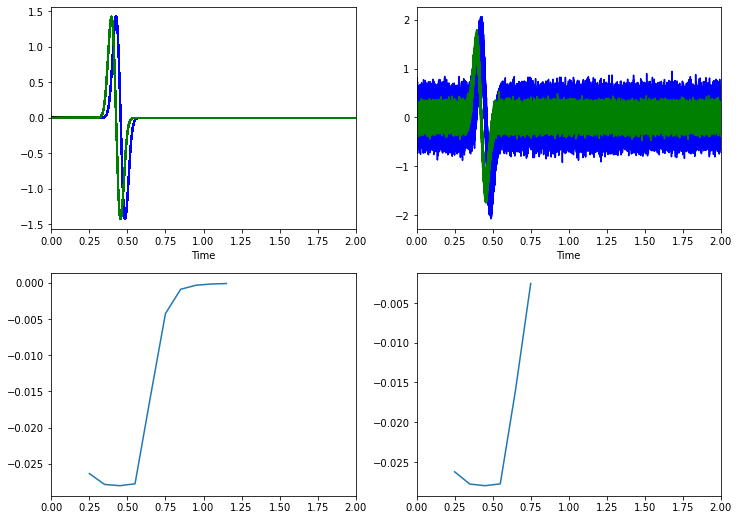

In [22]:
sampling_frequency = 1000
time_extent = (0, 2)
n_trials = 500
time_halfbandwidth_product = 1

n_time_samples = ((time_extent[1] - time_extent[0]) * sampling_frequency) + 1
time = np.linspace(time_extent[0], time_extent[1], num=n_time_samples)

signal1 = (scipy.stats.norm.pdf(time, .43, .025) - scipy.stats.norm.pdf(time, .48, .025)) / 10
signal1 = signal1[:, np.newaxis] * np.ones((len(time), n_trials))
signal2 = (scipy.stats.norm.pdf(time, .40, .025) - scipy.stats.norm.pdf(time, .45, .025)) / 10
signal2 = signal2[:, np.newaxis] * np.ones((len(time), n_trials))

noise1 = np.random.normal(0, .2, size=(len(time), n_trials))
noise2 = np.random.normal(0, .1, size=(len(time), n_trials))
data1 = signal1 + noise1
data2 = signal2 + noise2

signals = np.stack((signal1, signal2), axis=-1)
data = np.stack((data1, data2), axis=-1)

fig, axis_handles = plt.subplots(2, 2, figsize=(12, 9))
axis_handles[0, 0].plot(time, signal1, color='blue');
axis_handles[0, 0].plot(time, signal2, color='green');
axis_handles[0, 0].set_xlabel('Time')
axis_handles[0, 0].set_xlim(time_extent);

axis_handles[0, 1].plot(time, data1, color='blue');
axis_handles[0, 1].plot(time, data2, color='green');
axis_handles[0, 1].set_xlabel('Time')
axis_handles[0, 1].set_xlim(time_extent);

m = Multitaper(signals,
               sampling_frequency=sampling_frequency,
               time_halfbandwidth_product=time_halfbandwidth_product,
                time_window_duration=0.500,
               time_window_step=0.100,
               start_time=time[0])
c = Connectivity(fourier_coefficients=m.fft(),
                 frequencies=m.frequencies,
                 time=m.time)

delay, slope, r_value = c.group_delay(frequencies_of_interest=[0, 15], frequency_resolution=m.frequency_resolution)
axis_handles[1, 0].plot(c.time + m.time_window_duration/2, delay[..., 0, 1]);
axis_handles[1, 0].set_xlim(time_extent)

m = Multitaper(data,
               sampling_frequency=sampling_frequency,
               time_halfbandwidth_product=time_halfbandwidth_product,
               time_window_duration=0.500,
               time_window_step=0.100,
               start_time=time[0])
c = Connectivity(fourier_coefficients=m.fft(),
                 frequencies=m.frequencies,
                 time=m.time)

delay, slope, r_value = c.group_delay(frequencies_of_interest=[0, 15], frequency_resolution=m.frequency_resolution)
axis_handles[1, 1].plot(c.time + m.time_window_duration/2, delay[..., 0, 1]);
axis_handles[1, 1].set_xlim(time_extent);

## Phase Slope Index

#### Signal \#1 leads Signal \#2

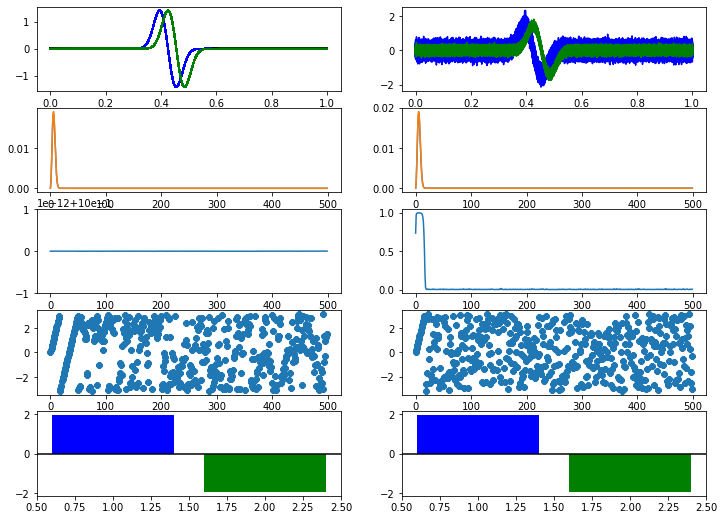

In [23]:
sampling_frequency = 1000
time_extent = (0, 1)
n_trials = 500
time_halfbandwidth_product = 1

n_time_samples = ((time_extent[1] - time_extent[0]) * sampling_frequency) + 1
time = np.linspace(time_extent[0], time_extent[1], num=n_time_samples)

signal1 = (scipy.stats.norm.pdf(time, .40, .025) - scipy.stats.norm.pdf(time, .45, .025)) / 10
signal1 = signal1[:, np.newaxis] * np.ones((len(time), n_trials))
signal2 = (scipy.stats.norm.pdf(time, .43, .025) - scipy.stats.norm.pdf(time, .48, .025)) / 10
signal2 = signal2[:, np.newaxis] * np.ones((len(time), n_trials))

noise1 = np.random.normal(0, .2, size=(len(time), n_trials))
noise2 = np.random.normal(0, .1, size=(len(time), n_trials))
data1 = signal1 + noise1
data2 = signal2 + noise2

signals = np.stack((signal1, signal2), axis=-1)
data = np.stack((data1, data2), axis=-1)

fig, axis_handles = plt.subplots(5, 2, figsize=(12, 9))
axis_handles[0, 0].plot(time, signal1, color='blue');
axis_handles[0, 0].plot(time, signal2, color='green');
axis_handles[0, 0].set_xlabel('Time')

axis_handles[0, 1].plot(time, data1, color='blue');
axis_handles[0, 1].plot(time, data2, color='green');
axis_handles[0, 1].set_xlabel('Time')

m = Multitaper(signals,
               sampling_frequency=sampling_frequency,
               time_halfbandwidth_product=time_halfbandwidth_product,
               start_time=time[0])
c = Connectivity(fourier_coefficients=m.fft(),
                 frequencies=m.frequencies,
                 time=m.time)

axis_handles[1, 0].plot(c.frequencies, c.power()[..., 0].squeeze())
axis_handles[1, 0].plot(c.frequencies, c.power()[..., 1].squeeze())
axis_handles[2, 0].plot(c.frequencies, c.coherence_magnitude()[..., 0, 1].squeeze())
axis_handles[3, 0].plot(c.frequencies, c.coherence_phase()[..., 0, 1].squeeze(), linestyle='None', marker='8')

psi = c.phase_slope_index(frequencies_of_interest=[2, 10], frequency_resolution=m.frequency_resolution)
axis_handles[4, 0].bar([1, 2], [psi[..., 0, 1].squeeze(), psi[..., 1, 0].squeeze()], color=['b', 'g']);
axis_handles[4, 0].set_xlim((0.5, 2.5))
axis_handles[4, 0].axhline(0, color='black');

m = Multitaper(data,
               sampling_frequency=sampling_frequency,
               time_halfbandwidth_product=time_halfbandwidth_product,
               start_time=time[0])
c = Connectivity(fourier_coefficients=m.fft(),
                 frequencies=m.frequencies,
                 time=m.time)

axis_handles[1, 1].plot(c.frequencies, c.power()[..., 0].squeeze())
axis_handles[1, 1].plot(c.frequencies, c.power()[..., 1].squeeze())
axis_handles[2, 1].plot(c.frequencies, c.coherence_magnitude()[..., 0, 1].squeeze())
axis_handles[3, 1].plot(c.frequencies, c.coherence_phase()[..., 0, 1].squeeze(), linestyle='None', marker='8')

psi = c.phase_slope_index(frequencies_of_interest=[2, 10], frequency_resolution=m.frequency_resolution)
axis_handles[4, 1].bar([1, 2], [psi[..., 0, 1].squeeze(), psi[..., 1, 0].squeeze()], color=['b', 'g']);
axis_handles[4, 1].set_xlim((0.5, 2.5));
axis_handles[4, 1].axhline(0, color='black');

#### Signal \#2 leads Signal \#1

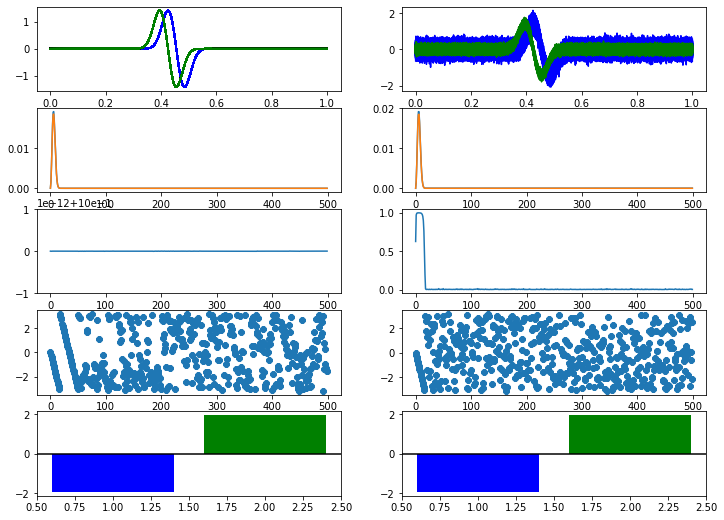

In [24]:
sampling_frequency = 1000
time_extent = (0, 1)
n_trials = 500
time_halfbandwidth_product = 1

n_time_samples = ((time_extent[1] - time_extent[0]) * sampling_frequency) + 1
time = np.linspace(time_extent[0], time_extent[1], num=n_time_samples)

signal1 = (scipy.stats.norm.pdf(time, .43, .025) - scipy.stats.norm.pdf(time, .48, .025)) / 10
signal1 = signal1[:, np.newaxis] * np.ones((len(time), n_trials))
signal2 = (scipy.stats.norm.pdf(time, .40, .025) - scipy.stats.norm.pdf(time, .45, .025)) / 10
signal2 = signal2[:, np.newaxis] * np.ones((len(time), n_trials))

noise1 = np.random.normal(0, .2, size=(len(time), n_trials))
noise2 = np.random.normal(0, .1, size=(len(time), n_trials))
data1 = signal1 + noise1
data2 = signal2 + noise2

signals = np.stack((signal1, signal2), axis=-1)
data = np.stack((data1, data2), axis=-1)

fig, axis_handles = plt.subplots(5, 2, figsize=(12, 9))
axis_handles[0, 0].plot(time, signal1, color='blue');
axis_handles[0, 0].plot(time, signal2, color='green');
axis_handles[0, 0].set_xlabel('Time')

axis_handles[0, 1].plot(time, data1, color='blue');
axis_handles[0, 1].plot(time, data2, color='green');
axis_handles[0, 1].set_xlabel('Time')

m = Multitaper(signals,
               sampling_frequency=sampling_frequency,
               time_halfbandwidth_product=time_halfbandwidth_product,
               start_time=time[0])
c = Connectivity(fourier_coefficients=m.fft(),
                 frequencies=m.frequencies,
                 time=m.time)

axis_handles[1, 0].plot(c.frequencies, c.power()[..., 0].squeeze())
axis_handles[1, 0].plot(c.frequencies, c.power()[..., 1].squeeze())
axis_handles[2, 0].plot(c.frequencies, c.coherence_magnitude()[..., 0, 1].squeeze())
axis_handles[3, 0].plot(c.frequencies, c.coherence_phase()[..., 0, 1].squeeze(), linestyle='None', marker='8')

psi = c.phase_slope_index(frequencies_of_interest=[2, 10], frequency_resolution=m.frequency_resolution)
axis_handles[4, 0].bar([1, 2], [psi[..., 0, 1].squeeze(), psi[..., 1, 0].squeeze()], color=['b', 'g']);
axis_handles[4, 0].set_xlim((0.5, 2.5))
axis_handles[4, 0].axhline(0, color='black');

m = Multitaper(data,
               sampling_frequency=sampling_frequency,
               time_halfbandwidth_product=time_halfbandwidth_product,
               start_time=time[0])
c = Connectivity(fourier_coefficients=m.fft(),
                 frequencies=m.frequencies,
                 time=m.time)

axis_handles[1, 1].plot(c.frequencies, c.power()[..., 0].squeeze())
axis_handles[1, 1].plot(c.frequencies, c.power()[..., 1].squeeze())
axis_handles[2, 1].plot(c.frequencies, c.coherence_magnitude()[..., 0, 1].squeeze())
axis_handles[3, 1].plot(c.frequencies, c.coherence_phase()[..., 0, 1].squeeze(), linestyle='None', marker='8')

psi = c.phase_slope_index(frequencies_of_interest=[2, 10], frequency_resolution=m.frequency_resolution)
axis_handles[4, 1].bar([1, 2], [psi[..., 0, 1].squeeze(), psi[..., 1, 0].squeeze()], color=['b', 'g']);
axis_handles[4, 1].set_xlim((0.5, 2.5));
axis_handles[4, 1].axhline(0, color='black');

Text(0, 0.5, 'Phase Slope Index')

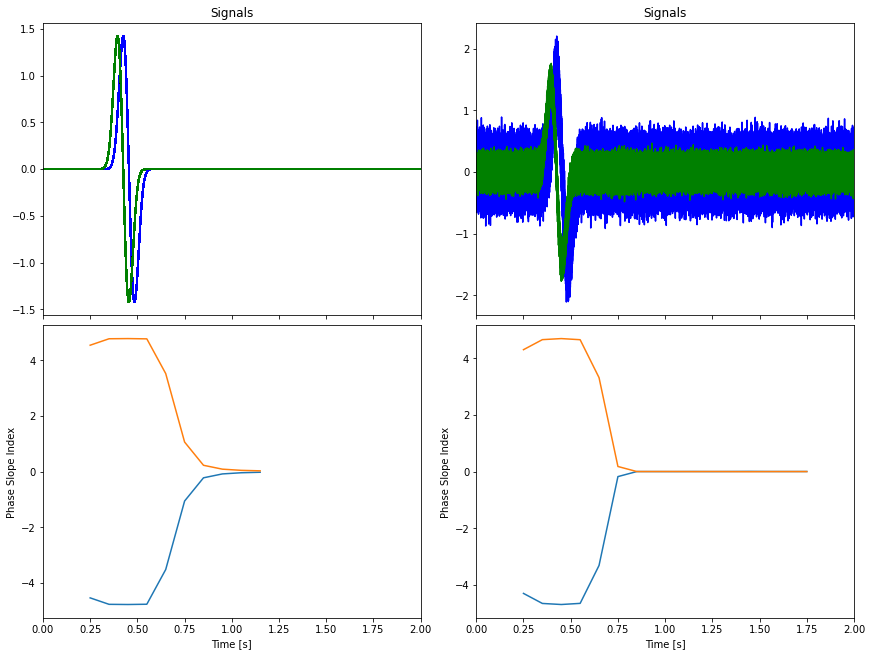

In [25]:
sampling_frequency = 1000
time_extent = (0, 2)
n_trials = 500
time_halfbandwidth_product = 1

n_time_samples = ((time_extent[1] - time_extent[0]) * sampling_frequency) + 1
time = np.linspace(time_extent[0], time_extent[1], num=n_time_samples)

signal1 = (scipy.stats.norm.pdf(time, .43, .025) - scipy.stats.norm.pdf(time, .48, .025)) / 10
signal1 = signal1[:, np.newaxis] * np.ones((len(time), n_trials))
signal2 = (scipy.stats.norm.pdf(time, .40, .025) - scipy.stats.norm.pdf(time, .45, .025)) / 10
signal2 = signal2[:, np.newaxis] * np.ones((len(time), n_trials))

noise1 = np.random.normal(0, .2, size=(len(time), n_trials))
noise2 = np.random.normal(0, .1, size=(len(time), n_trials))
data1 = signal1 + noise1
data2 = signal2 + noise2

signals = np.stack((signal1, signal2), axis=-1)
data = np.stack((data1, data2), axis=-1)

fig, axis_handles = plt.subplots(2, 2, figsize=(12, 9), constrained_layout=True, sharex=True)
axis_handles[0, 0].plot(time, signal1, color='blue');
axis_handles[0, 0].plot(time, signal2, color='green');
axis_handles[0, 0].set_title('Signals')
axis_handles[0, 0].set_xlim(time_extent);

axis_handles[0, 1].plot(time, data1, color='blue');
axis_handles[0, 1].plot(time, data2, color='green');
axis_handles[0, 1].set_title('Signals')
axis_handles[0, 1].set_xlim(time_extent);

m = Multitaper(signals,
               sampling_frequency=sampling_frequency,
               time_halfbandwidth_product=time_halfbandwidth_product,
                time_window_duration=0.500,
               time_window_step=0.100,
               start_time=time[0])
c = Connectivity(fourier_coefficients=m.fft(),
                 frequencies=m.frequencies,
                 time=m.time)

psi = c.phase_slope_index(frequencies_of_interest=[0, 15], frequency_resolution=m.frequency_resolution)
axis_handles[1, 0].plot(c.time  + m.time_window_duration/2, psi[..., 0, 1], c.time  + m.time_window_duration/2, psi[..., 1, 0])
axis_handles[1, 0].set_xlim(time_extent)
axis_handles[1, 0].set_xlabel('Time [s]')
axis_handles[1, 0].set_ylabel('Phase Slope Index')

m = Multitaper(data,
               sampling_frequency=sampling_frequency,
               time_halfbandwidth_product=time_halfbandwidth_product,
               time_window_duration=0.500,
               time_window_step=0.100,
               start_time=time[0])
c = Connectivity(fourier_coefficients=m.fft(),
                 frequencies=m.frequencies,
                 time=m.time)

psi = c.phase_slope_index(frequencies_of_interest=[0, 15], frequency_resolution=m.frequency_resolution)
axis_handles[1, 1].plot(c.time + m.time_window_duration/2, psi[..., 0, 1], c.time + m.time_window_duration/2, psi[..., 1, 0]);
axis_handles[1, 1].set_xlim(time_extent);
axis_handles[1, 1].set_xlabel('Time [s]')
axis_handles[1, 1].set_ylabel('Phase Slope Index')

### Canonical Coherence

The advantage of canonical coherence is that it can be more statistically powerful than coherence because it is combining coherence from groups.

frequency resolution: 50.0


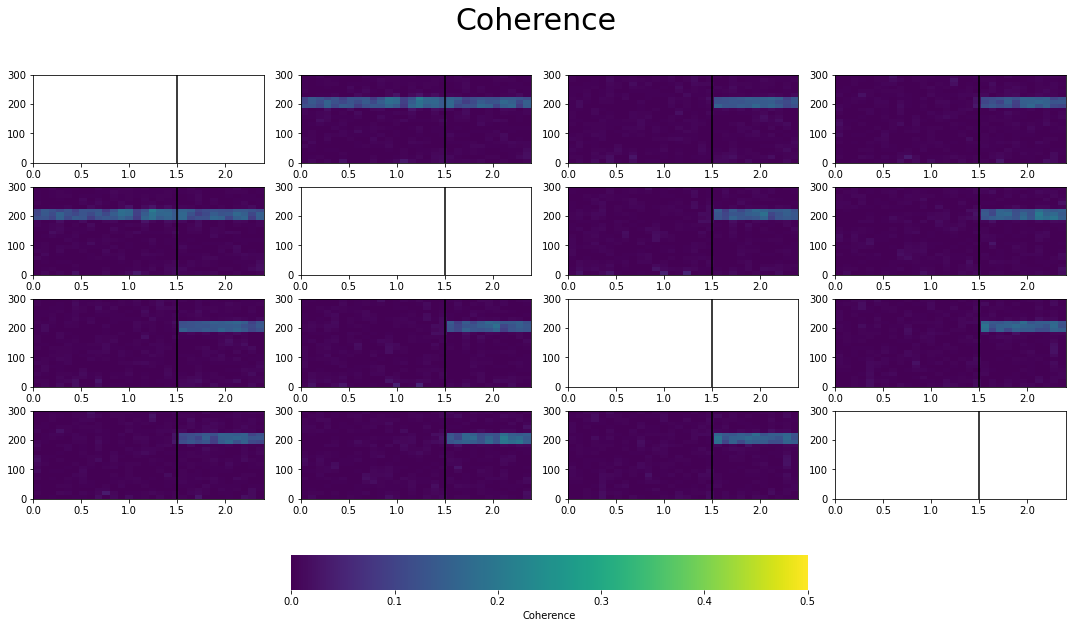

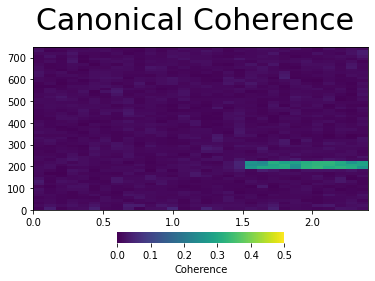

In [26]:
from itertools import product

time_halfbandwidth_product = 2
frequency_of_interest = 200
sampling_frequency = 1500
time_extent = (0, 2.400)
n_trials = 100
n_signals = 4
n_time_samples = int(((time_extent[1] - time_extent[0]) * sampling_frequency) + 1)
time = np.linspace(time_extent[0], time_extent[1], num=n_time_samples, endpoint=True)

signal = np.zeros((n_time_samples, n_trials, n_signals))
signal[:, :, 0:2] = (
    np.sin(2 * np.pi * time * frequency_of_interest)[:, np.newaxis, np.newaxis] *
    np.ones((1, n_trials, 2)))

other_signals = (n_signals + 1) // 2
n_other_signals = n_signals - other_signals
phase_offset = np.random.uniform(-np.pi, np.pi, size=(n_time_samples, n_trials, n_other_signals))
phase_offset[np.where(time > 1.5), :] = np.pi / 2
signal[:, :, other_signals:] = np.sin(
    (2 * np.pi * time[:, np.newaxis, np.newaxis] * frequency_of_interest) + phase_offset)
noise = np.random.normal(0, 4, signal.shape)


m = Multitaper(signal + noise,
               sampling_frequency=sampling_frequency,
               time_halfbandwidth_product=time_halfbandwidth_product,
               time_window_duration=0.080,
               time_window_step=0.080,
               start_time=time[0])
c = Connectivity(fourier_coefficients=m.fft(),
                 frequencies=m.frequencies,
                 time=m.time)

time_grid, freq_grid = np.meshgrid(
    np.append(c.time, time_extent[-1]),
    np.append(c.frequencies, m.nyquist_frequency))

fig, axes = plt.subplots(nrows=n_signals, ncols=n_signals, figsize=(15, 9))
meshes = list()
for ind1, ind2 in product(range(n_signals), range(n_signals)):
    if ind1 == ind2:
        vmin, vmax = c.power().min(), c.power().max()
    else:
        vmin, vmax = 0, 0.5
    mesh = axes[ind1, ind2].pcolormesh(
        time_grid, freq_grid, c.coherence_magnitude()[..., ind1, ind2].squeeze().T,
        vmin=vmin, vmax=vmax, cmap='viridis')
    meshes.append(mesh)
    axes[ind1, ind2].set_ylim((0, 300))
    axes[ind1, ind2].set_xlim(time_extent)
    axes[ind1, ind2].axvline(1.5, color='black')

plt.suptitle('Coherence', y=1.02, fontsize=30)
plt.tight_layout()
cb = fig.colorbar(meshes[-2], ax=axes.ravel().tolist(), orientation='horizontal',
                  shrink=.5, aspect=15, pad=0.1, label='Coherence')
cb.outline.set_linewidth(0)
print('frequency resolution: {}'.format(m.frequency_resolution))


group_labels = (['a'] * (n_signals - n_other_signals)) + (['b'] * n_other_signals)
canonical_coherence, pair_labels = c.canonical_coherence(group_labels)
fig = plt.figure()
mesh = plt.pcolormesh(time_grid, freq_grid, canonical_coherence[..., 0, 1].squeeze().T,
               vmin=0, vmax=0.5, cmap='viridis')
plt.suptitle('Canonical Coherence', y=1.02, fontsize=30)
cb = fig.colorbar(mesh, ax=plt.gca(), orientation='horizontal',
                  shrink=.5, aspect=15, pad=0.1, label='Coherence')
cb.outline.set_linewidth(0);

#### More signals, higher noise

frequency resolution: 50.0


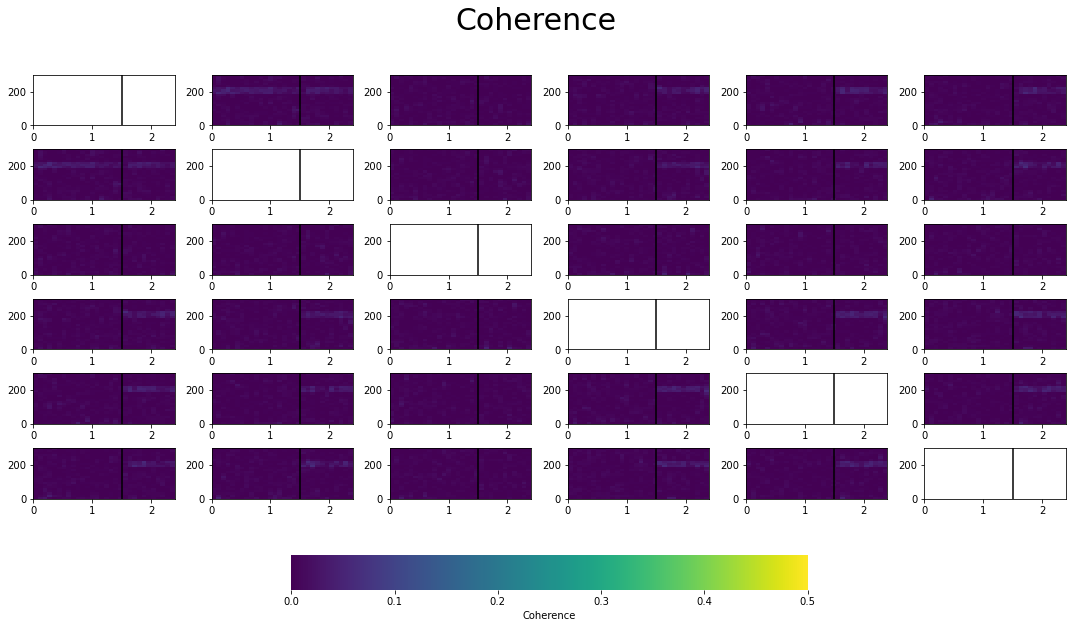

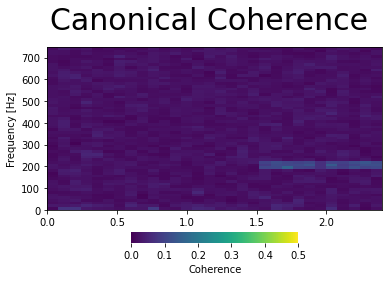

In [27]:
from itertools import product

time_halfbandwidth_product = 2
frequency_of_interest = 200
sampling_frequency = 1500
time_extent = (0, 2.400)
n_trials = 100
n_signals = 6
n_time_samples = int(((time_extent[1] - time_extent[0]) * sampling_frequency) + 1)
time = np.linspace(time_extent[0], time_extent[1], num=n_time_samples, endpoint=True)

signal = np.zeros((n_time_samples, n_trials, n_signals))
signal[:, :, 0:2] = (
    np.sin(2 * np.pi * time * frequency_of_interest)[:, np.newaxis, np.newaxis] *
    np.ones((1, n_trials, 2)))

other_signals = (n_signals + 1) // 2
n_other_signals = n_signals - other_signals
phase_offset = np.random.uniform(-np.pi, np.pi, size=(n_time_samples, n_trials, n_other_signals))
phase_offset[np.where(time > 1.5), :] = np.pi / 2
signal[:, :, other_signals:] = np.sin(
    (2 * np.pi * time[:, np.newaxis, np.newaxis] * frequency_of_interest) + phase_offset)
noise = np.random.normal(10, 7, signal.shape)


m = Multitaper(signal + noise,
               sampling_frequency=sampling_frequency,
               time_halfbandwidth_product=time_halfbandwidth_product,
               time_window_duration=0.080,
               time_window_step=0.080,
               start_time=time[0])
c = Connectivity(fourier_coefficients=m.fft(),
                 frequencies=m.frequencies,
                 time=m.time)

time_grid, freq_grid = np.meshgrid(
    np.append(c.time, time_extent[-1]),
    np.append(c.frequencies, m.nyquist_frequency))

fig, axes = plt.subplots(nrows=n_signals, ncols=n_signals, figsize=(15, 9))
meshes = list()
for ind1, ind2 in product(range(n_signals), range(n_signals)):
    if ind1 == ind2:
        vmin, vmax = c.power().min(), c.power().max()
    else:
        vmin, vmax = 0, 0.5
    mesh = axes[ind1, ind2].pcolormesh(
        time_grid, freq_grid, c.coherence_magnitude()[..., ind1, ind2].squeeze().T,
        vmin=vmin, vmax=vmax, cmap='viridis')
    meshes.append(mesh)
    axes[ind1, ind2].set_ylim((0, 300))
    axes[ind1, ind2].set_xlim(time_extent)
    axes[ind1, ind2].axvline(1.5, color='black')

plt.suptitle('Coherence', y=1.02, fontsize=30)
plt.tight_layout()
cb = fig.colorbar(meshes[-2], ax=axes.ravel().tolist(), orientation='horizontal',
                  shrink=.5, aspect=15, pad=0.1, label='Coherence')
cb.outline.set_linewidth(0)
print('frequency resolution: {}'.format(m.frequency_resolution))


group_labels = (['a'] * (n_signals - n_other_signals)) + (['b'] * n_other_signals)
canonical_coherence, pair_labels = c.canonical_coherence(group_labels)
fig = plt.figure()
mesh = plt.pcolormesh(time_grid, freq_grid, canonical_coherence[..., 0, 1].squeeze().T,
               vmin=0, vmax=0.5, cmap='viridis')
plt.xlabel('Time [s]')
plt.ylabel('Frequency [Hz]')
plt.suptitle('Canonical Coherence', y=1.02, fontsize=30)
cb = fig.colorbar(mesh, ax=plt.gca(), orientation='horizontal',
                  shrink=.5, aspect=15, pad=0.1, label='Coherence')
cb.outline.set_linewidth(0);


### Global Coherence

Global coherence finds the linear combinations of signals that maximizes the power at a given frequency.

Text(0, 0.5, 'Frequency [Hz]')

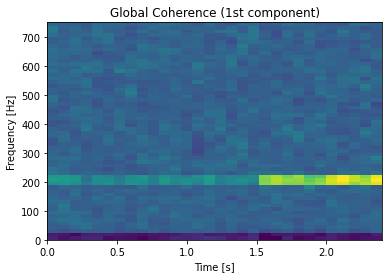

In [28]:
from itertools import product

time_halfbandwidth_product = 2
frequency_of_interest = 200
sampling_frequency = 1500
time_extent = (0, 2.400)
n_trials = 100
n_signals = 6
n_time_samples = int(((time_extent[1] - time_extent[0]) * sampling_frequency) + 1)
time = np.linspace(time_extent[0], time_extent[1], num=n_time_samples, endpoint=True)

signal = np.zeros((n_time_samples, n_trials, n_signals))
signal[:, :, 0:2] = (
    np.sin(2 * np.pi * time * frequency_of_interest)[:, np.newaxis, np.newaxis] *
    np.ones((1, n_trials, 2)))

other_signals = (n_signals + 1) // 2
n_other_signals = n_signals - other_signals
phase_offset = np.random.uniform(-np.pi, np.pi, size=(n_time_samples, n_trials, n_other_signals))
phase_offset[np.where(time > 1.5), :] = np.pi / 2
signal[:, :, other_signals:] = np.sin(
    (2 * np.pi * time[:, np.newaxis, np.newaxis] * frequency_of_interest) + phase_offset)
noise = np.random.normal(10, 7, signal.shape)


m = Multitaper(signal + noise,
               sampling_frequency=sampling_frequency,
               time_halfbandwidth_product=time_halfbandwidth_product,
               time_window_duration=0.080,
               time_window_step=0.080,
               start_time=time[0])
c = Connectivity(fourier_coefficients=m.fft(),
                 frequencies=m.frequencies,
                 time=m.time)

global_coherence, unnormalized_global_coherence = c.global_coherence()
global_coherence.shape # n_time, n_frequencies, n_components
time_grid, freq_grid = np.meshgrid(
    np.append(c.time, time_extent[-1]),
    np.append(c.frequencies, m.nyquist_frequency))
plt.figure()
plt.pcolormesh(time_grid, freq_grid, global_coherence[:, c.all_frequencies >= 0, 0].T, shading='auto')
plt.title('Global Coherence (1st component)')
plt.xlabel('Time [s]')
plt.ylabel('Frequency [Hz]')

#### Xarray interface

The xarray interface provides three things:
1. a nicely labeled output for the connectivity dimensions
2. a unified way of estimating the spectral power and connectivity together.
3. easy and quick plotting

In [29]:
coherence_magnitude = multitaper_connectivity(signal + noise,
                       sampling_frequency=sampling_frequency,
                       time_halfbandwidth_product=time_halfbandwidth_product,
                       time_window_duration=0.080,
                       time_window_step=0.080,
                       method='coherence_magnitude')

coherence_magnitude

<xarray.DataArray 'coherence_magnitude' (Time: 30, Frequency: 60, Source: 6,
                                         Target: 6)>
array([[[[           nan, 4.17427328e-03, 1.07317692e-02,
          3.92682620e-04, 1.94288854e-04, 7.63830425e-03],
         [4.17427328e-03,            nan, 1.48046432e-03,
          2.25131140e-02, 4.83493848e-03, 2.39187694e-04],
         [1.07317692e-02, 1.48046432e-03,            nan,
          7.06440208e-03, 1.34941411e-02, 4.40993929e-03],
         [3.92682620e-04, 2.25131140e-02, 7.06440208e-03,
                     nan, 1.03604259e-03, 1.54857363e-03],
         [1.94288854e-04, 4.83493848e-03, 1.34941411e-02,
          1.03604259e-03,            nan, 4.17113567e-03],
         [7.63830425e-03, 2.39187694e-04, 4.40993929e-03,
          1.54857363e-03, 4.17113567e-03,            nan]],

        [[           nan, 6.07132474e-03, 1.06837308e-02,
          5.58518234e-03, 5.35516564e-03, 6.56414374e-04],
         [6.07132474e-03,            nan, 5.25065232e-03,
          2.50987390e-02, 5.65057587e-03, 3.28009963e-03],
         [1.06837308e-02, 5.25065232e-03,            nan,
          2.72184087e-03, 6.55198523e-03, 5.31858255e-03],
         [5.58518234e-03, 2.50987390e-02, 2.72184087e-03,
...
          1.85750416e-03, 6.91237759e-03, 8.68356780e-03],
         [3.48218467e-03, 1.32147224e-03, 1.85750416e-03,
                     nan, 4.32967003e-03, 1.12540807e-03],
         [1.30909266e-03, 4.45264836e-03, 6.91237759e-03,
          4.32967003e-03,            nan, 3.39148671e-03],
         [5.77028546e-04, 3.06993841e-03, 8.68356780e-03,
          1.12540807e-03, 3.39148671e-03,            nan]],

        [[           nan, 2.21181958e-03, 2.08280048e-03,
          2.02529245e-03, 2.21701363e-03, 4.48675106e-03],
         [2.21181958e-03,            nan, 2.27244267e-03,
          9.58201618e-03, 1.66471344e-03, 2.85296512e-03],
         [2.08280048e-03, 2.27244267e-03,            nan,
          4.57495028e-03, 5.98183781e-03, 2.01931947e-03],
         [2.02529245e-03, 9.58201618e-03, 4.57495028e-03,
                     nan, 2.52555640e-03, 1.03476690e-03],
         [2.21701363e-03, 1.66471344e-03, 5.98183781e-03,
          2.52555640e-03,            nan, 6.88009269e-03],
         [4.48675106e-03, 2.85296512e-03, 2.01931947e-03,
          1.03476690e-03, 6.88009269e-03,            nan]]]])
Coordinates:
  * Time       (Time) float64 0.0 0.08 0.16 0.24 0.32 ... 2.08 2.16 2.24 2.32
  * Frequency  (Frequency) float64 0.0 12.5 25.0 37.5 ... 712.5 725.0 737.5
  * Source     (Source) int64 0 1 2 3 4 5
  * Target     (Target) int64 0 1 2 3 4 5
Attributes:
    mt_detrend_type:                constant
    mt_frequency_resolution:        50.0
    mt_is_low_bias:                 True
    mt_n_fft_samples:               120
    mt_n_signals:                   6
    mt_n_tapers:                    3
    mt_n_time_samples_per_step:     120
    mt_n_time_samples_per_window:   120
    mt_n_trials:                    100
    mt_nyquist_frequency:           750.0
    mt_sampling_frequency:          1500
    mt_start_time:                  0
    mt_time_halfbandwidth_product:  2
    mt_time_window_duration:        0.08
    mt_time_window_step:            0.08

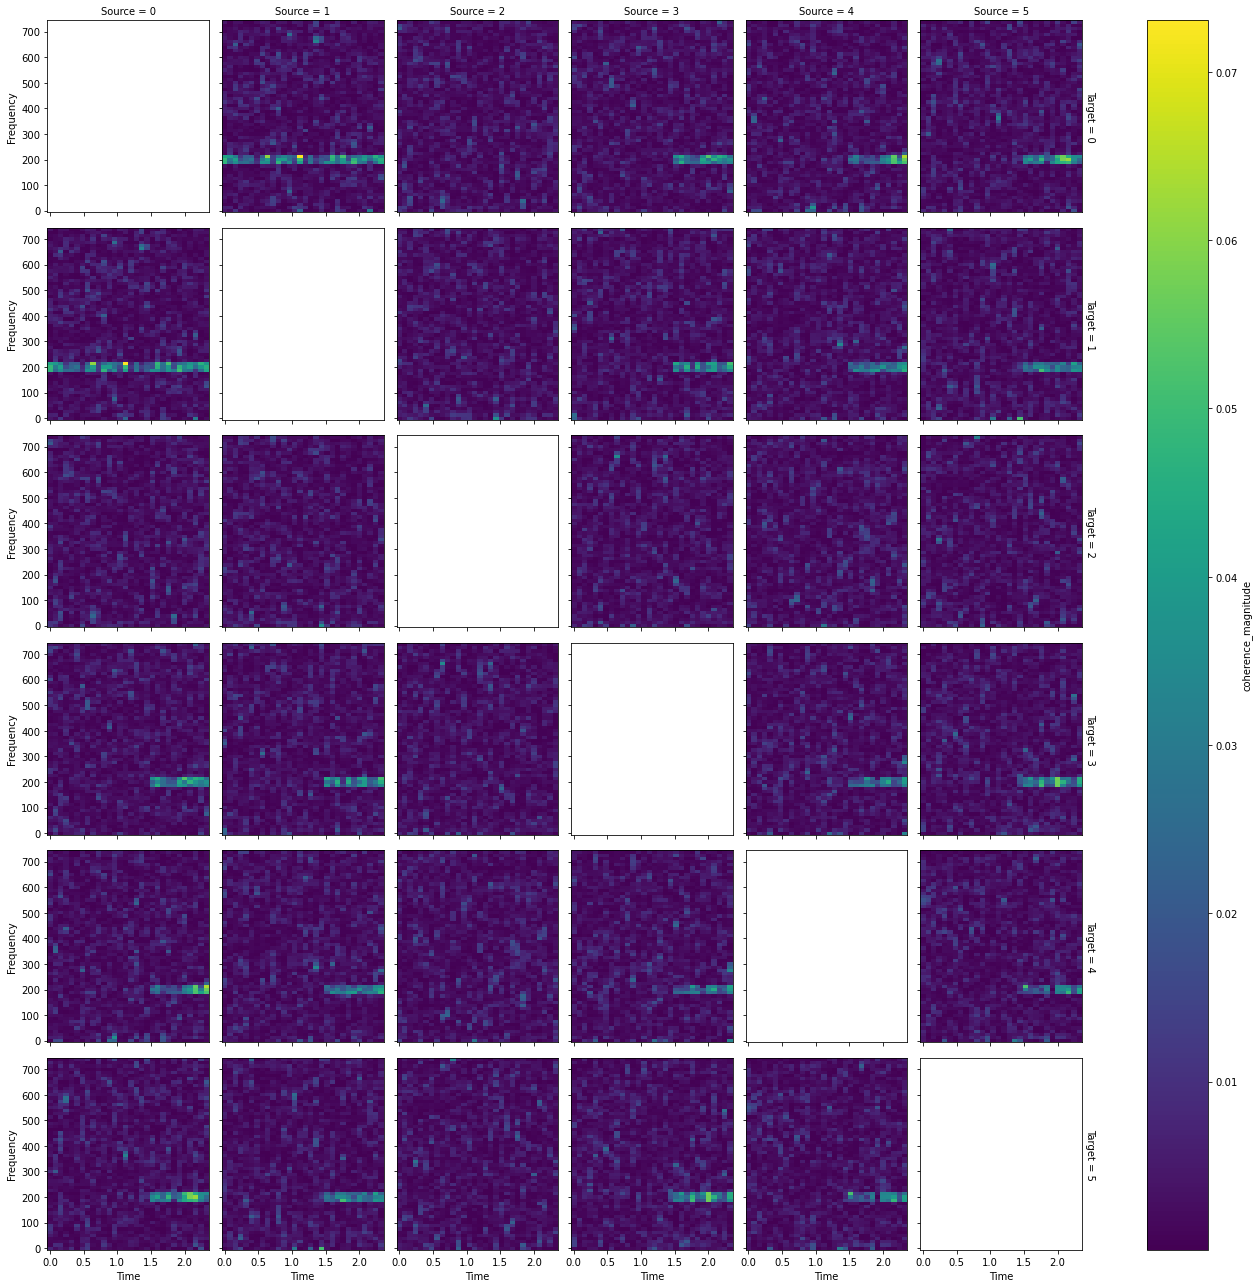

In [30]:
coherence_magnitude.plot(col='Source', row='Target', x='Time');